## ***PROJET MACHINE LEARNING : Implementation d'un model de recommandation de repas***

# ***Phase 1 : Business understanding***

+ CLASSIFICATION 

**🎯BO 1** : Trouver rapidement des recettes personnalisées, adaptées à ses goûts, à son régime alimentaire (ex. végétarien, faible en calories) et à ses habitudes de consommation.

**📊DSO 1:** Mettre en place un système de recommandation intelligent capable de proposer des recettes personnalisées en fonction des préférences des utilisateurs, de leur régime alimentaire et de leurs habitudes de consommation, en s’appuyant sur des approches de filtrage collaboratif et/ou de filtrage par contenu.

**📊Algorithme à appliquer :**
SVM

**📊Pourquoi ?**
Classifier les recettes adaptées à un utilisateur selon son profil (préférences et régime).




**🎯BO 2 :** Identifier les facteurs qui influencent la popularité d’une recette, afin de comprendre pourquoi certaines plaisent davantage et comment les optimiser pour obtenir de meilleures évaluations.

**📊DSO 2 :** Analyser les données de notation et de consommation des recettes afin de mettre en évidence les corrélations et les associations entre les caractéristiques des recettes (ingrédients, temps de préparation, valeurs nutritionelles, etc.) et leur popularité, en utilisant des techniques comme les règles d’association.

**📊Algorithme à appliquer :**
Règles d’association

**📊Pourquoi ?**
Identifier les patterns d’ingrédients et caractéristiques qui rendent une recette populaire.

**🎯 BO 3** :Anticiper la note qu’une recette pourrait obtenir en fonction de ses caractéristiques (ingrédients, valeurs nutritionnelles, catégorie), afin d’évaluer son potentiel de succès.

**📊 DSO 3** :Développer un modèle de régression capable de prédire la note d’une recette à partir de ses caractéristiques, et identifier les variables les plus influentes grâce à des techniques telles que la régression linéaire.

**📊Algorithme à appliquer :**
Régression linéaire

**📊Pourquoi ?**
Prédiction de notes numériques, simple et interprétable

**🎯BO 4 :**
Proposer des campagnes marketing personnalisées et adaptées à leurs profils et préférences.

**📊 DSO 4 :**
Segmenter les utilisateurs existants (ex. sportifs, gourmets, healthy) en groupes homogènes à l’aide d’algorithmes de clustering tels que K-Means, DBSCAN ou le clustering hiérarchique, afin d’identifier des profils types pour un marketing ciblé.

**📊Algorithme à appliquer :**
K-Means

**📊Pourquoi ?**
Segmenter les utilisateurs en groupes homogènes pour marketing ciblé.

**🎯BO 5 :** Identifier le type de cuisine d’une recette en se basant sur ses ingrédients et regrouper les recettes  selon leurs similarités (nutrition, ingrédients, préférences), afin de faciliter la découverte de nouvelles recettes et améliorer les recommandations personnalisées.

**📊 DSO 5 :**
Utiliser des techniques d’apprentissage non supervisé pour regrouper les recettes  en fonction de leurs caractéristiques et ingrédients, et prédire le type de cuisine d’une recette à partir de sa composition.

**📊Algorithme à appliquer :**
ACP + DBSCAN

**📊Pourquoi ?**
Réduire la dimension des ingrédients (ACP) puis regrouper les recettes similaires (DBSCAN).

# ***Phase 2 : Data understanding***

### **1. Importations necessaires**

In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import re
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

from itertools import chain
from mlxtend.frequent_patterns import apriori
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from threadpoolctl import threadpool_limits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier



### **2. Charger le dataset**

In [674]:
recipes = pd.read_csv('recipes.csv')
reviews = pd.read_csv('reviews.csv')


La dataset est formée de 2 dataframes : les données sur les recettes se trouvent dans "recipes" et les données des users/profiles dans "reviews".

### a. Explication de colonne par colonne : 

#### i. Recipes : 

| Nom de la colonne              | Signification / Référence               |          Type        |
| ------------------------------ | --------------------------------------- | -------------------- |
| **RecipeId**                   | Identifiant unique de la recette        | `int64`              |
| **Name**                       | Nom de la recette                       | `object` (str)       |
| **AuthorId**                   | Identifiant de l’auteur                 | `int64`              |
| **AuthorName**                 | Nom de l’auteur                         | `object` (str)       |
| **CookTime**                   | Temps de cuisson (ISO 8601)             | `object` (str)       |
| **PrepTime**                   | Temps de préparation (ISO 8601)         | `object` (str)       |
| **TotalTime**                  | Temps total pour préparer et cuire      | `object` (str)       |
| **DatePublished**              | Date de publication de la recette       | `datetime64[ns]`     |
| **Description**                | Description ou résumé de la recette     | `object` (str)       |
| **Images**                     | URL ou chemin de l’image de la recette  | `object` (str)       |
| **RecipeCategory**             | Catégorie de la recette                 | `object` (str)       |
| **Keywords**                   | Mots-clés associés à la recette         | `object` (str)       |
| **RecipeIngredientQuantities** | Quantité des ingrédients                | `object` (str)       |
| **RecipeIngredientParts**      | Nom des ingrédients                     | `object` (str)       |
| **AggregatedRating**           | Note moyenne de la recette              | `float64`            |
| **ReviewCount**                | Nombre d’avis                           | `int64`              |
| **Calories**                   | Valeur énergétique totale               | `float64`            |
| **FatContent**                 | Quantité totale de matières grasses (g) | `float64`            |
| **SaturatedFatContent**        | Quantité de graisses saturées (g)       | `float64`            |
| **CholesterolContent**         | Teneur en cholestérol (mg)              | `float64`            |
| **SodiumContent**              | Teneur en sodium (mg)                   | `float64`            |
| **CarbohydrateContent**        | Quantité de glucides (g)                | `float64`            |
| **FiberContent**               | Quantité de fibres (g)                  | `float64`            |
| **SugarContent**               | Quantité de sucres (g)                  | `float64`            |
| **ProteinContent**             | Quantité de protéines (g)               | `float64`            |
| **RecipeServings**             | Nombre de portions                      | `int64`              |
| **RecipeYield**                | Rendement ou quantité finale obtenue    | `object` (str)       |
| **RecipeInstructions**         | Étapes de préparation de la recette     | `object` (str)       |


#### ii. Reviews : 

| Nom de la colonne | Signification / Référence                   |         Type         |
| ----------------- | ------------------------------------------- | -------------------- |
| **ReviewId**      | Identifiant unique de l’avis                | `int64`              |
| **RecipeId**      | Identifiant de la recette associée à l’avis | `int64`              |
| **AuthorId**      | Identifiant de l’auteur de l’avis           | `int64`              |
| **AuthorName**    | Nom de l’auteur de l’avis                   | `object` (str)       |
| **Rating**        | Note donnée à la recette                    | `int64`              |
| **Review**        | Texte de l’avis / commentaire               | `object` (str)       |
| **DateSubmitted** | Date à laquelle l’avis a été soumis         | `datetime64[ns]`     |
| **DateModified**  | Date de dernière modification de l’avis     | `datetime64[ns]`     |


#### ii. Suppression de colonnes sémantiquement pas nécessaires : 

In [675]:
df_reviews = reviews.drop(
    ['AuthorName', 'DateSubmitted', 'DateModified'], 
    axis=1, 
    errors='ignore'
)

df_recipes = recipes.drop(
    ['Images', 'AuthorName', 'DatePublished', 'AuthorId'], 
    axis=1, 
    errors='ignore'
)

print("Colonnes restantes dans les recipes : \n")
print(df_recipes.columns.tolist())
print(" \n")
print("Colonnes restantes dans les reviews : \n")
print(df_reviews.columns.tolist())


Colonnes restantes dans les recipes : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']
 

Colonnes restantes dans les reviews : 

['ReviewId', 'RecipeId', 'AuthorId', 'Rating', 'Review']


### b. Les dimensions du dataset

In [676]:
print("Taille des recipes : ")
print(df_recipes.shape)
print("\nTaille des reviews : ")
print(df_reviews.shape)


Taille des recipes : 
(522517, 24)

Taille des reviews : 
(1401982, 5)


##### On remarque que la dataset est très géante, donc on va procéder à la diminution de nombre de lignes :
Réduction aléatoire de recipes,

puis récupération des RecipeId disponibles

enfin, filtrage des reviews correspondantes

In [677]:
#df_recipes_small = df_recipes.sample(frac=0.0025, random_state=42)
df_recipes_small = df_recipes.sample(frac=0.05, random_state=42)

selected_ids = df_recipes_small['RecipeId'].tolist()

df_reviews_small = df_reviews[df_reviews['RecipeId'].isin(selected_ids)]


##### Les nouveaux dimensions :

In [678]:
print("Taille des recipes : ")
print(df_recipes_small.shape)
print("\nTaille des reviews : ")
print(df_reviews_small.shape)


Taille des recipes : 
(26126, 24)

Taille des reviews : 
(71876, 5)


### c. Le pourcentage des valeurs nulles du dataset par colonne :

In [679]:
null_percent_recipes = df_recipes_small.isnull().mean() * 100
print("Pourcentage de valeurs nulles par colonne (recipes) :")
print(null_percent_recipes)
null_percent_reviews = df_reviews_small.isnull().mean() * 100
print("\nPourcentage de valeurs nulles par colonne (reviews) :")
print(null_percent_reviews)


Pourcentage de valeurs nulles par colonne (recipes) :
RecipeId                       0.000000
Name                           0.000000
CookTime                      15.838628
PrepTime                       0.000000
TotalTime                      0.000000
Description                    0.000000
RecipeCategory                 0.145449
Keywords                       3.127153
RecipeIngredientQuantities     0.000000
RecipeIngredientParts          0.000000
AggregatedRating              48.090025
ReviewCount                   47.010641
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000
RecipeServings                34.739340
RecipeYield                   67.270152
RecipeInstructions        

#### on remarque que 70% des records de RecipeYield sont nuls et meme les valeurs non nuls ne sont pas significatives. C'est pour ca qu'on a décider de la supprimer : 

In [680]:
df_recipes_small = df_recipes_small.drop(
    ['RecipeYield'], 
    axis=1, 
    errors='ignore'
)
print("Colonnes de recipes restantes apres suppression : \n")
print(df_recipes_small.columns.tolist())


Colonnes de recipes restantes apres suppression : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeInstructions']


 #### d/ Valeurs nutritionnelles saisies incorrectement
 
 Toute valeur nutritionnelle égale à 0 ou infini constitue une erreur de saisie de données, nous pouvons donc les supprimer sans risque.

In [681]:
nutrition_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

df_recipes_small = df_recipes_small.replace([np.inf, -np.inf], np.nan)

rows_with_zeros = df_recipes_small[(df_recipes_small[nutrition_cols] == 0).any(axis=1)].copy()
print(f"Lignes à supprimer : {rows_with_zeros.shape[0]}")


Lignes à supprimer : 6563


In [682]:
df_recipes_small = df_recipes_small.dropna(subset=nutrition_cols)
df_recipes_small = df_recipes_small[(df_recipes_small[nutrition_cols] != 0).all(axis=1)]


### e. Nombre d'avis

Les recettes dont le nombre d'avis ReviewCount est nul ont simplement 0 reviews associés.

In [683]:
df_recipes_small['ReviewCount'] = df_recipes_small['ReviewCount'].fillna(0)

 ### f. Description sur les colonnes

In [684]:
print(df_recipes_small.describe())
print(df_reviews_small.describe())


            RecipeId  AggregatedRating   ReviewCount      Calories  \
count   19563.000000      10153.000000  19563.000000  19563.000000   
mean   269997.584011          4.633606      2.913868    533.416955   
std    155390.668742          0.638633     13.375748    826.973719   
min        44.000000          1.000000      0.000000     11.500000   
25%    136647.500000          4.500000      0.000000    219.400000   
50%    267144.000000          5.000000      1.000000    361.900000   
75%    404039.500000          5.000000      2.000000    569.100000   
max    541359.000000          5.000000    642.000000  45609.000000   

         FatContent  SaturatedFatContent  CholesterolContent  SodiumContent  \
count  19563.000000         19563.000000        19563.000000   19563.000000   
mean      28.206502            11.473097          107.623902     750.350861   
std       50.564534            24.040932          172.974700    1723.707172   
min        0.100000             0.100000            0

### g. Distribution de données : ( histogrammes / boxplots )

 #### **i.recipes :** 

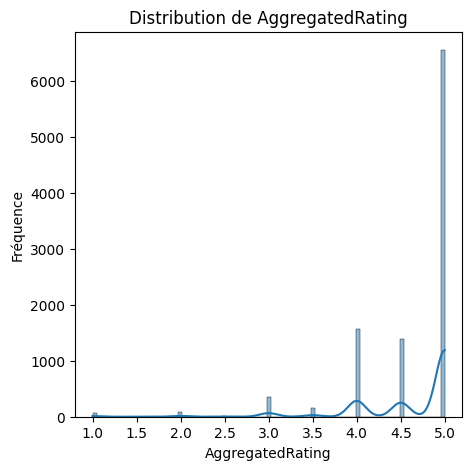

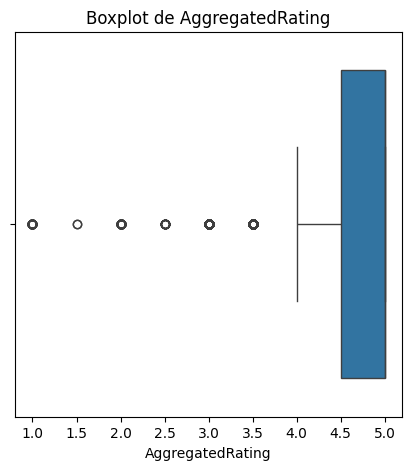

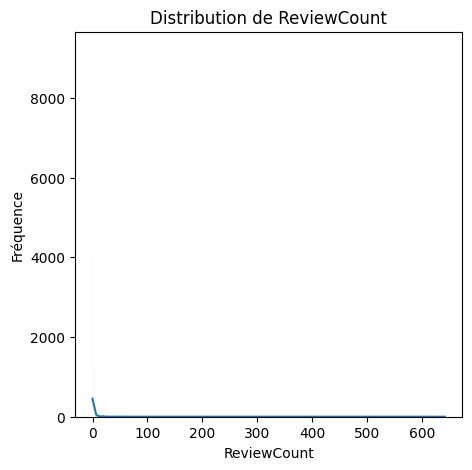

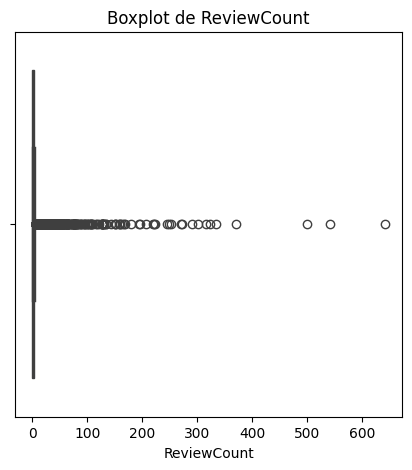

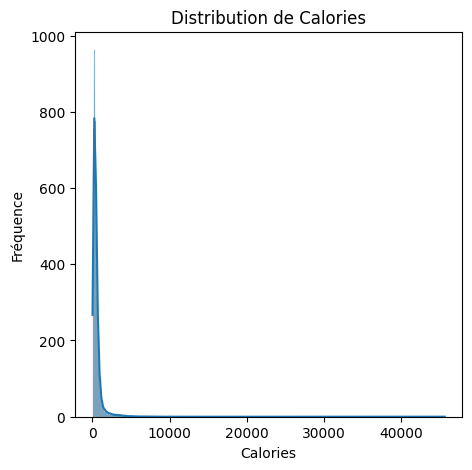

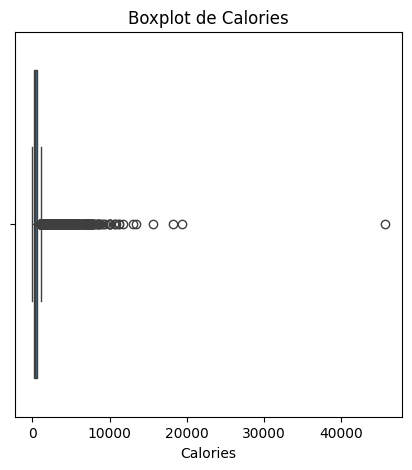

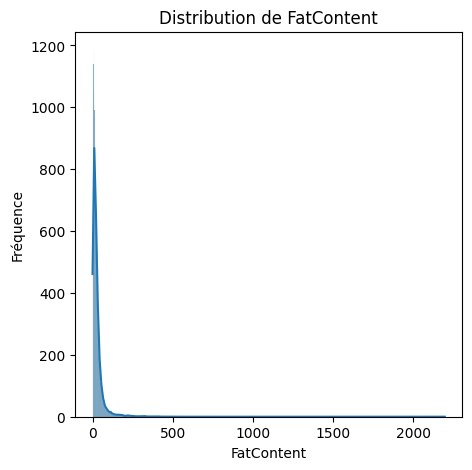

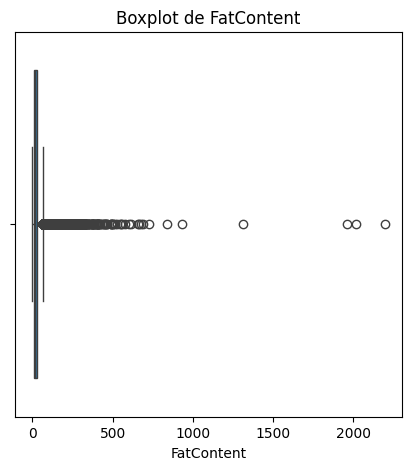

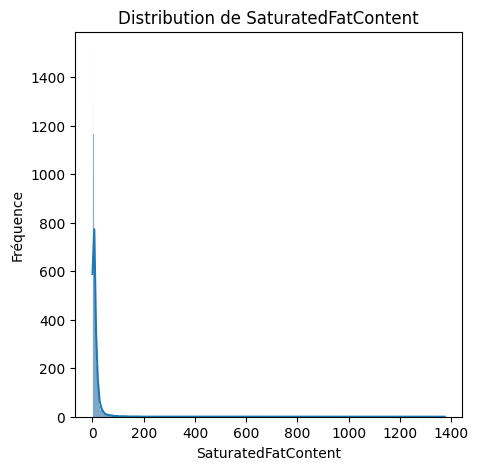

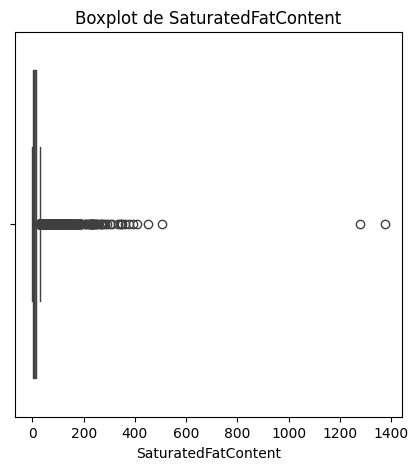

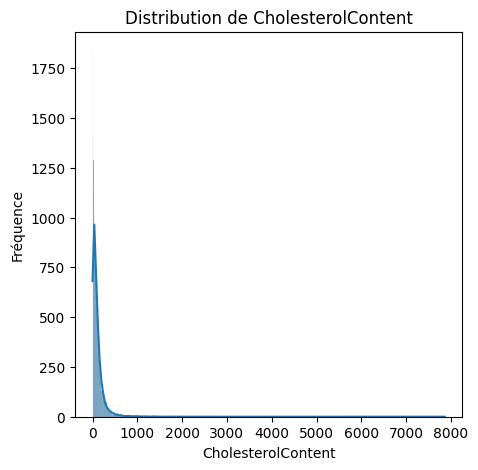

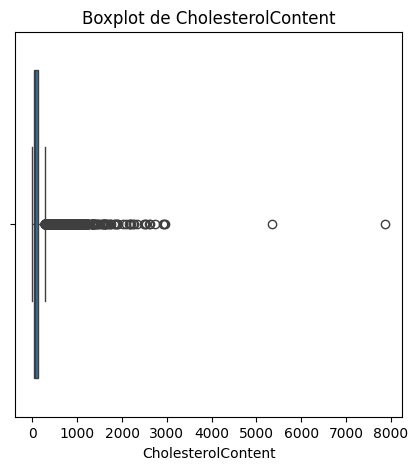

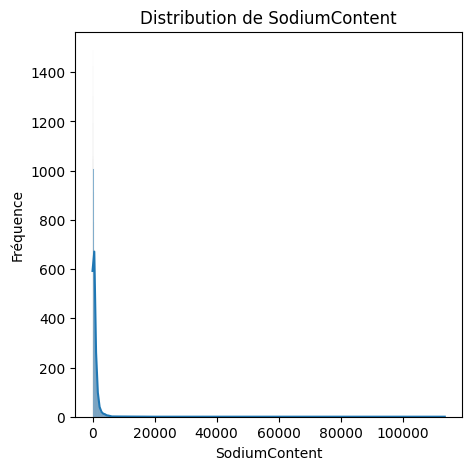

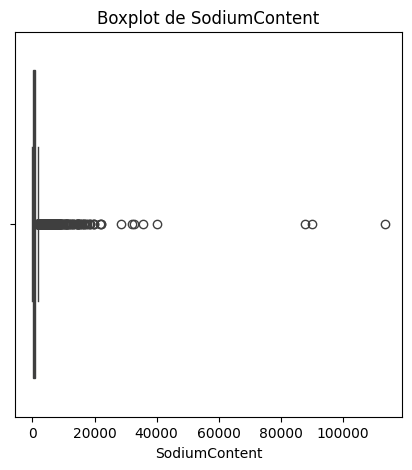

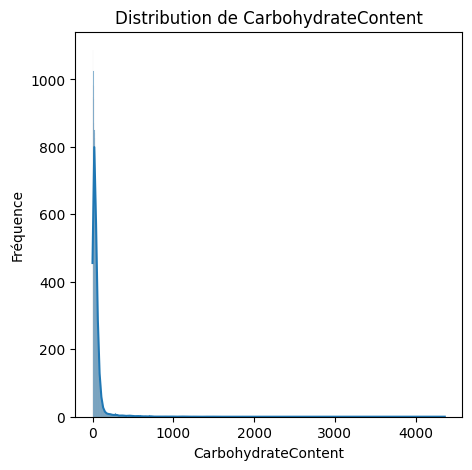

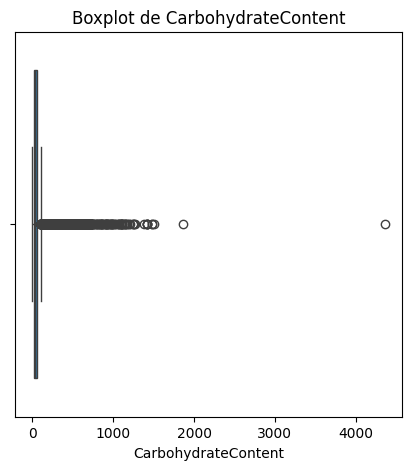

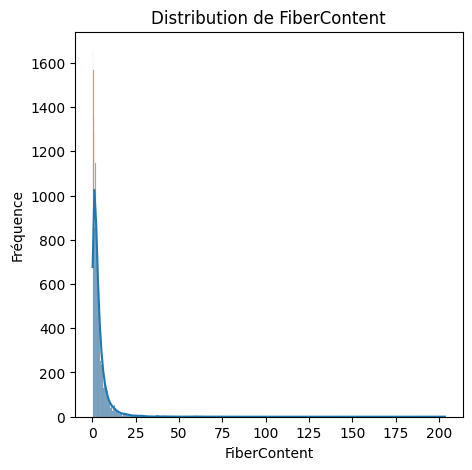

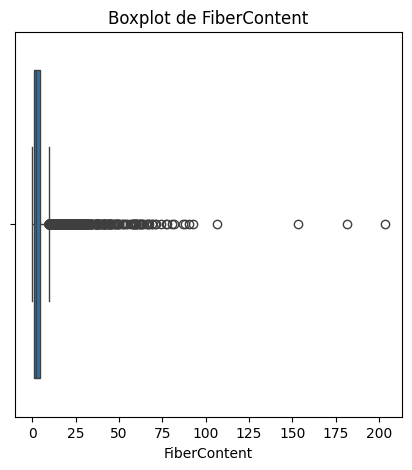

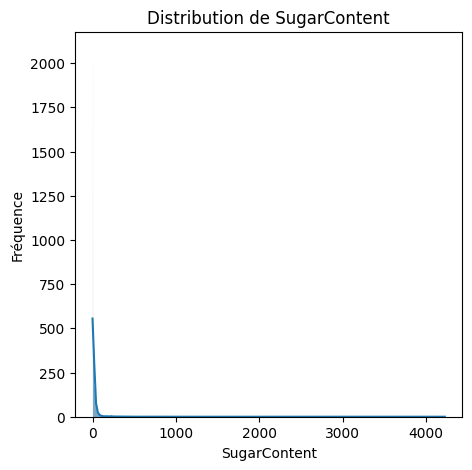

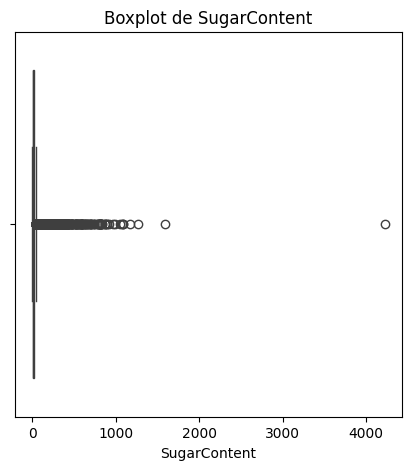

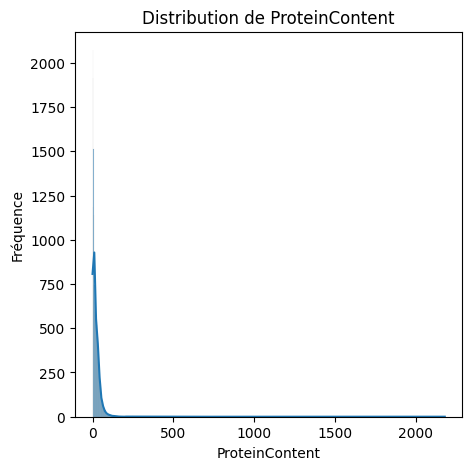

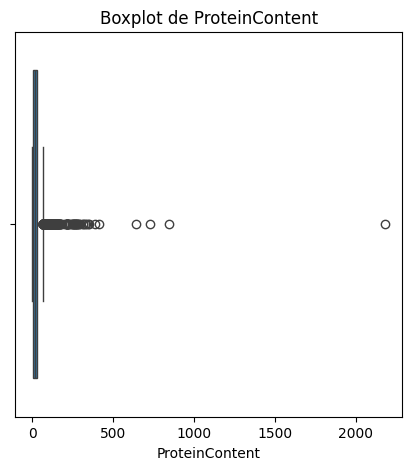

In [685]:
numeric_cols = [
    "AggregatedRating", "ReviewCount", "Calories", "FatContent",
    "SaturatedFatContent", "CholesterolContent", "SodiumContent",
    "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent"]
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df_recipes_small[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_recipes_small[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


 #### **ii.reviews :** 

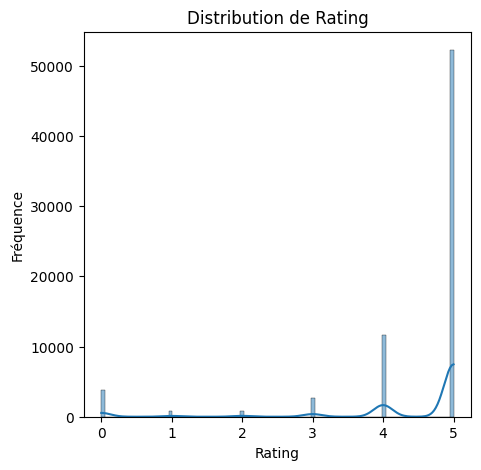

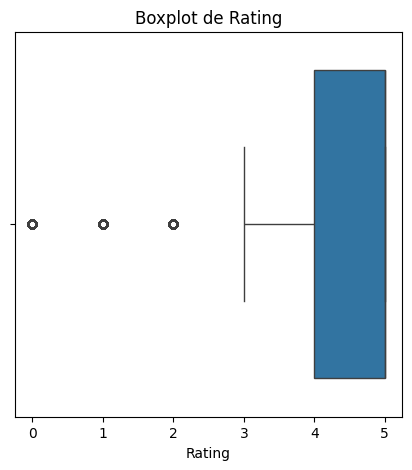

In [686]:
plt.figure(figsize=(5,5))
sns.histplot(df_reviews_small["Rating"], kde=True)
plt.title(f"Distribution de Rating")
plt.xlabel("Rating")
plt.ylabel("Fréquence")
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(x=df_reviews_small["Rating"])
plt.title(f"Boxplot de Rating")
plt.show()


 ## Interpretation de la description et de la distrubtion ( Quelques informations a retenir sur les données ) :

#### - Recipes

* Notes globalement élevées : moyenne ≈ 4,67/5.

* Popularité très inégale : ReviewCount de 1 à 157 avis.

* Nutrition variable avec des valeurs extrêmes : calories 0–6553 kcal, protéines 0–712 g, matières grasses 0–496 g.

* Portions : 1–84, médiane 6.



#### - Reviews

* Notes majoritairement élevées : moyenne ≈ 4,67/5.

* Variabilité faible : la majorité des avis sont 4 ou 5.

* Certaines recettes ont peu d’avis, ce qui peut influencer la fiabilité de la note moyenne.

→ Points clés : valeurs extrêmes à contrôler, popularité et nombre d’avis très variables.

In [687]:
zero_counts = (df_recipes_small == 0).sum()

print(zero_counts[zero_counts > 0])


ReviewCount    9198
dtype: int64


# ***Phase 3 : Data preparation***

 ### Formater les données pour une meilleur utilisation ML :

 #### a/ Nom de la recette :

In [688]:
def clean_name(name):
    if pd.isna(name):
        return None
    name = name.lower()
    name = re.sub(r"[^a-z\s]", "", name)
    name = re.sub(r"\s+", " ", name)
    name = name.strip()
    return name
df_recipes_small['Name'] = df_recipes_small['Name'].apply(clean_name)


 #### b/ Prep-time / Cook-time / Total-time de la recette :

In [689]:
def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    time_str = str(time_str).lower().strip()
    if time_str.startswith('pt'):
        hours = re.search(r'(\d+)h', time_str)
        minutes = re.search(r'(\d+)m', time_str)
        total_minutes = 0
        if hours:
            total_minutes += int(hours.group(1)) * 60
        if minutes:
            total_minutes += int(minutes.group(1))
        return total_minutes if total_minutes > 0 else None
    hours = re.search(r'(\d+)\s*h', time_str)
    minutes = re.search(r'(\d+)\s*m', time_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    if total_minutes == 0 and time_str.isdigit():
        return int(time_str)
    return total_minutes if total_minutes > 0 else None


for col in ['CookTime', 'PrepTime', 'TotalTime']:
    df_recipes_small[col] = df_recipes_small[col].apply(convert_to_minutes)


 #### c/ FatContent / SaturatedFatContent / CholesterolContent / SodiumContent / CarbohydrateContent / FiberContent / SugarContent / ProteinContent : 
 (Les valeurs manquantes sont remplacées par la moyenne et on a utilisé le StandardScaler pour la standarisation de leurs valeurs)

In [690]:
for col in nutrition_cols:
    mean_val = df_recipes_small[col].mean()
    df_recipes_small[col] = df_recipes_small[col].fillna(mean_val)
scaler = MinMaxScaler()


* Justification de choix : 

    Pourquoi MinMaxScaler ? 
    - met toutes les colonnes numériques sur une échelle commune [0,1], ce qui conserve les proportions relatives des nutriments et évite que les variables avec de grandes valeurs (ex : Sodium, Calories) dominent les algorithmes ML.

    Pourquoi Imputation par la moyenne ? 
    - remplace les valeurs manquantes par la moyenne de la colonne pour conserver la distribution globale et éviter de biaiser les données, tout en gardant la cohérence des quantités nutritionnelles.

 #### d/ Description :

In [691]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text
df_recipes_small['Description'] = df_recipes_small['Description'].apply(clean_text)


 #### d/ RecipeInstructions :

In [692]:
def clean_instructions(instr):
    if pd.isna(instr):
        return ""
    
    instr = str(instr)
    steps = re.findall(r'"(.*?)"', instr)
    text = " ".join(steps) if steps else instr
    text = text.lower()                       
    text = re.sub(r"[^a-z0-9\s]", "", text)  
    text = re.sub(r"\s+", " ", text)         
    text = text.strip()                       
    return text
df_recipes_small['RecipeInstructions'] = df_recipes_small['RecipeInstructions'].apply(clean_instructions)


 #### e/ RecipeCategory :

Nombre de Categories uniques :

In [693]:
print("Nombre de catégories uniques :", df_recipes_small['RecipeCategory'].nunique())


Nombre de catégories uniques : 230


Remarque : 
- Le nombre de categories uniques est trés élevé (138) ce qui empeche de procéder directement a un encodage car ca risque de creer beaucoup de colonnes qui sont nulles et inutiles.
On va donc essayer de faire un traitement spécifique :

ETAPE 1 : Ces catégories sont trés spécifiques, donc on va les mettre tout a 'None' puis ensuite les remplacer par une categorie qu'on va créer qui est 'Other'

In [694]:

non_food_tags = [
    'bath/beauty', '< 15 mins', '< 30 mins', '< 60 mins', '< 4 hours',
    'easy', 'beginner cook', 'kid friendly', 'inexpensive', 'from scratch',
    'high protein', 'low protein', 'low cholesterol', 'very low carbs',
    'high in...'
]
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].str.lower()
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: None if x in non_food_tags else x
)


ETAPE 2 : Regroupement des catégories rares (Si une catégorie a moins de 5 recettes, on la remplace par 'other' pour réduire la dimensionnalité avant encodage)

In [695]:
category_counts = df_recipes_small['RecipeCategory'].value_counts()
rare_categories = category_counts[category_counts < 5].index.tolist()
print ("Catégories rares :", rare_categories)
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: 'other' if x in rare_categories else x
)


Catégories rares : ['spring', 'peanut butter', 'cherries', 'mango', 'citrus', 'egg free', 'orange roughy', 'russian', 'bass', 'microwave', 'broil/grill', 'vegan', 'raspberries', 'creole', 'pumpkin', 'pennsylvania dutch', 'scandinavian', 'sweet', 'rabbit', 'polynesian', 'moose', 'native american', 'vietnamese', 'whitefish', 'mixer', 'artichoke', 'pheasant', 'hunan', 'hungarian', 'medium grain rice', 'austrian', "st. patrick's day", 'danish', 'stir fry', 'swiss', 'south african', 'norwegian', 'icelandic', 'cambodian', 'bean soup', 'hawaiian', 'szechuan', 'plums', 'ethiopian', 'nepalese', 'quail', 'puerto rican', 'camping', 'filipino', 'chilean', 'finnish', 'scottish', 'refrigerator', 'baking', 'pot roast', 'no cook', 'peruvian', 'indonesian', 'lime', 'guatemalan', 'malaysian', 'steam', 'palestinian', 'cantonese', 'swedish', 'key lime pie']


ETAPE 3 : Gestion des valeurs manquantes (Les valeurs manquantes (None) ou supprimées à l’étape 1 → remplacer par 'other')

In [696]:
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].fillna('other')
print("Nombre de catégories uniques après nettoyage :", df_recipes_small['RecipeCategory'].nunique())


Nombre de catégories uniques après nettoyage : 151


ETAPE 4 : OneHot Encodage

In [697]:
df_recipes_small = pd.get_dummies(
    df_recipes_small, 
    columns=['RecipeCategory'], 
    prefix='Category'            
)


Justification de choix : 


On a utilisé OneHotEncoder parce que :

 * Les catégories n’ont aucun ordre implicite, donc un encodage numérique simple (LabelEncoder) pourrait induire une relation fictive.

 * OneHot transforme chaque catégorie en colonne binaire, ce qui est idéal pour les algos ML sensibles à l’ordre (régression, NN, SVM).

 #### e/ RecipeIngredientParts et RecipeIngredientQuantities :

ETAPE 1 : nettoyage

In [698]:
def parse_ingredients(parts_str, quantities_str):
    if pd.isna(parts_str) or pd.isna(quantities_str):
        return [], []
    
    parts_str = str(parts_str)
    quantities_str = str(quantities_str)
    
    parts = re.findall(r'"(.*?)"', parts_str)
    quantities = re.findall(r'"(.*?)"', quantities_str)
    
    if not parts:
        parts = [p.strip() for p in parts_str.split(',') if p.strip()]
    if not quantities:
        quantities = [q.strip() for q in quantities_str.split(',') if q.strip()]
    
    if len(quantities) != len(parts):
        quantities = [1]*len(parts)
    
    quantities_float = []
    for q in quantities:
        try:
            quantities_float.append(float(q))
        except (ValueError, TypeError):
            m = re.findall(r'[\d.]+', str(q))
            quantities_float.append(float(m[0]) if m else 1)
    
    return parts, quantities_float


ETAPE 2 : encodage avec Multi-hot encoding

In [699]:
df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'] = zip(*df_recipes_small.apply(
    lambda row: parse_ingredients(row['RecipeIngredientParts'], row['RecipeIngredientQuantities']),
    axis=1
))
all_ingredients = sorted(set(chain.from_iterable(df_recipes_small['IngredientList'])))
print(f"Nombre total d'ingrédients uniques : {len(all_ingredients)}")
ingredient_matrix = np.zeros((len(df_recipes_small), len(all_ingredients)))
for i, (parts, qtys) in enumerate(zip(df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'])):
    for part, qty in zip(parts, qtys):
        idx = all_ingredients.index(part)
        ingredient_matrix[i, idx] = qty

df_ingredients_encoded = pd.DataFrame(ingredient_matrix, columns=all_ingredients)
scaler = MinMaxScaler()
df_ingredients_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_ingredients_encoded), columns=all_ingredients)
df_ingredients_encoded_scaled.head()
df_recipes_small_reset = df_recipes_small.reset_index(drop=True)
df_ingredients_encoded_scaled_reset = df_ingredients_encoded_scaled.reset_index(drop=True)
df_recipes_small = pd.concat([df_recipes_small_reset, df_ingredients_encoded_scaled_reset], axis=1)
cols_to_drop = ['RecipeIngredientParts', 'RecipeIngredientQuantities', 'IngredientList', 'IngredientQtyList']
df_recipes_small.drop(columns=cols_to_drop, inplace=True)


Nombre total d'ingrédients uniques : 3618


 #### f/ AggregatedRating :

In [700]:
mean_rating = df_recipes_small['AggregatedRating'].mean()
df_recipes_small['AggregatedRating'] = df_recipes_small['AggregatedRating'].fillna(mean_rating)
scaler = MinMaxScaler()
df_recipes_small['AggregatedRating'] = scaler.fit_transform(
    df_recipes_small[['AggregatedRating']]
)


 #### g/ Keywords :

ETAPE 1 : Nettoyage

In [701]:
def clean_keywords(kw_str):
    if pd.isna(kw_str) or not isinstance(kw_str, str):
        return []
    kw_str = kw_str.replace('c(', '').replace(')', '').replace('"', '')
    keywords = [k.strip() for k in kw_str.split(',') if k.strip()]
    keywords = [k for k in keywords if not re.search(r'\b(mins?|hours?)\b', k, re.IGNORECASE)]
    keywords = [re.sub(r'\.{2,}', '', k).strip() for k in keywords]
    keywords = [k for k in keywords if k]
    return keywords
df_recipes_small['CleanedKeywords'] = df_recipes_small['Keywords'].apply(clean_keywords)
df_recipes_small.drop(columns=['Keywords'], inplace=True)


ETAPE 2 : Encodage

In [702]:

mlb = MultiLabelBinarizer()
keywords_encoded = mlb.fit_transform(df_recipes_small['CleanedKeywords'])
df_keywords_encoded = pd.DataFrame(
    keywords_encoded,
    columns=mlb.classes_,
    index=df_recipes_small.index
)
df_recipes_small = pd.concat([df_recipes_small, df_keywords_encoded], axis=1)
df_recipes_small.drop(columns=['CleanedKeywords'], inplace=True, errors='ignore')


 #### h/ rating de Reviews :

In [703]:
df_reviews_small = df_reviews_small.copy()
mean_rating = df_reviews_small['Rating'].mean()
df_reviews_small['Rating'] = df_reviews_small['Rating'].fillna(mean_rating)
scaler = MinMaxScaler()
df_reviews_small['Rating_scaled'] = scaler.fit_transform(df_reviews_small[['Rating']])
df_reviews_small['Rating'] = df_reviews_small['Rating_scaled']
df_reviews_small.drop(columns=['Rating_scaled'], inplace=True)


#### Fusionner les 2 dataframes reviews et recipes sur la cle etrangere RecipeId :

In [704]:
df_finale = pd.merge(
    df_reviews_small,
    df_recipes_small,     
    on='RecipeId',        
    how='inner'          
)


In [705]:
df_finale.describe()


,ReviewId,RecipeId,AuthorId,Rating,CookTime,PrepTime,TotalTime,AggregatedRating,ReviewCount,Calories,...,Vietnamese,Weeknight,Welsh,White Rice,Whitefish,Whole Chicken,Wild Game,Winter,Yam/Sweet Potato,Yeast Breads
count,5.561300e+04,55613.000000,5.561300e+04,55613.000000,50734.000000,54200.000000,55341.000000,55613.000000,55613.000000,55613.000000,...,55613.000000,55613.000000,55613.000000,55613.000000,55613.000000,55613.000000,55613.000000,55613.000000,55613.000000,55613.000000
mean,8.119671e+05,148011.331901,1.546796e+08,0.882319,68.902235,42.373745,104.728248,0.956107,63.844011,476.348489,...,0.002841,0.114739,0.000737,0.001924,0.000018,0.001331,0.001223,0.032852,0.001313,0.000072
std,5.262183e+05,127767.950996,5.282341e+08,0.252981,180.750497,1137.732702,1139.149744,0.099350,116.721652,665.445488,...,0.053226,0.318710,0.027142,0.043822,0.004240,0.036454,0.034947,0.178251,0.036207,0.008481
min,1.400000e+01,44.000000,1.533000e+03,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.690920e+05,47669.000000,1.355660e+05,0.800000,15.000000,10.000000,25.000000,1.000000,4.000000,198.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.639520e+05,108105.000000,3.305450e+05,1.000000,25.000000,15.000000,40.000000,1.000000,14.000000,336.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.198763e+06,221248.000000,8.231870e+05,1.000000,50.000000,20.000000,70.000000,1.000000,61.000000,520.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.090319e+06,539244.000000,2.002901e+09,1.000000,5760.000000,86400.000000,86400.000000,1.000000,642.000000,45609.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### TABLEAU COMPARATIF : LA STRUCTURE DE DONNEES AVANT ET APRES PREPARATION
 

| Colonne                                                                                                                                             | Valeurs originales                                               | Valeurs après traitement                                           | Type de transformation            | Objectif pour ML                                         |
| --------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------ | --------------------------------- | -------------------------------------------------------- |
| `Name`                                                                                                                                              | Texte libre, majuscules/minuscules, espaces, caractères spéciaux | Minuscules, sans ponctuation ni espaces superflus                  | Nettoyage texte                   | Standardiser pour NLP / features textuelles              |
| `CookTime`, `PrepTime`, `TotalTime`                                                                                                                 | Strings type `"PT1H20M"`, `"45M"`, `"2H"`                        | Nombres entiers → minutes (ex: 80, 45, 120)                        | Parsing / Feature engineering     | Variables numériques continues exploitables              |
| `FatContent`, `SaturatedFatContent`, `CholesterolContent`, `SodiumContent`, `CarbohydrateContent`, `FiberContent`, `SugarContent`, `ProteinContent` | Strings avec unités (`"10g"`, `"5 mg"`), NaN possibles           | Float normalisé entre 0 et 1                                       | Imputation moyenne + MinMaxScaler | Uniformiser échelle pour ML                              |
| `Description`                                                                                                                                       | Texte long, ponctuation, majuscules/minuscules                   | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation pour NLP ou features textuelles              |
| `RecipeCategory`                                                                                                                                    | Strings multiples, ponctuation, références temps                 | OneHotEncoding (colonnes binaires par catégorie)                   | Encodage catégoriel               | Transformer catégories textuelles en features numériques |
| `Keywords` → `CleanedKeywords`                                                                                                                      | Strings multiples, ponctuation, `< 60 Mins`                      | Listes propres, sans ponctuation ni temps → OneHotEncoding         | Nettoyage + encodage multi-label  | Transformer mots-clés en features binaires exploitables  |
| `RecipeIngredientParts` & `RecipeIngredientQuantities`                                                                                              | Strings avec guillemets, nombres, NaN                            | Listes Python de strings et floats → OneHotEncoding + MinMaxScaler | Parsing + feature engineering     | Représentation numérique des ingrédients et quantités    |
| `AggregatedRating`                                                                                                                                  | Float avec NaN, valeurs répétitives (0 à 1)                      | Float normalisé entre 0 et 1, NaN remplacés par moyenne            | Imputation + scaling              | Normalisation des notes pour ML                          |
| `Review`                                                                                                                                            | Texte libre, majuscules/minuscules, ponctuation                  | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation NLP ou features textuelles                   |
| `Rating`                                                                                                                                            | Entiers 1–5, NaN possibles                                       | `Rating_scaled` float entre 0 et 1, original supprimé              | Imputation + MinMaxScaler         | Valeur normalisée pour ML                                |
| `RecipeId`                                                                                                                                          | Identifiant unique recette                                       | Inchangé                                                           | Clé étrangère                     | Permet la fusion avec `reviews` et association 1:1       |


# BO1 : Recommendation personalisée de recettes

# ***BO 2 : Popularité des recettes***

**Notions à appliquer :**  Règles d’association, Classification

**Définition de popularité :** la colonne ReviewCount est un indicateur directe de la popularité, un utilisateur donne son avis pour une recette qu'il a essayé


Nous allons créer un dataframe distinct (pop_df) pour analyser la corrélation entre le nombre d'avis (ReviewCount) et les autres valeurs.

Mais avant tout, nous devons analyser précisément la répartition de cette colone.

In [706]:
print(df_recipes_small['ReviewCount'].describe())


count    19563.000000
mean         2.913868
std         13.375748
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        642.000000
Name: ReviewCount, dtype: float64


Nous remarquons que la plupart des recettes ont très peu d'avis
- le troisième quartile Q3 a une valeur 2, ce qui signifie que plus de 75% des recettes ont 2 avis ou moins.

Nous éliminons les recettes sans reviews, car il s'agit probablement de doublons ou de spams provenant de nouveaux utilisateurs

In [707]:
pop_df = df_recipes_small.copy()
pop_df = pop_df[pop_df['ReviewCount'] != 0]
print(pop_df['ReviewCount'].describe())


count    10365.000000
mean         5.499662
std         17.985288
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        642.000000
Name: ReviewCount, dtype: float64


- le troisième quartile Q3 a encore une petite valeur de 4.

une simple prediction du nombre d'avis est presque impossible a cause de ce desequilibre.

Donc, pour cette analyse nous avons défini la categorie des recettes populaires comme celles ayant plus de 30 avis.

In [708]:
pop_df['popular'] = (pop_df['ReviewCount'] > 30).astype(int)

numeric_cols = [col for col in pop_df.select_dtypes(include=['float64', 'int64']).columns 
               if col not in ['ReviewCount', 'popular']]
X = pop_df[numeric_cols]

y = pop_df['popular']

print("Distribution de la cible:")
print(y.value_counts(normalize=True))


Distribution de la cible:
popular
0    0.97617
1    0.02383
Name: proportion, dtype: float64


Nous observons que les recettes populaires correspondant aux critères définis représentent une petite minorité (0,01 %).

Pour cette analyse, il est donc nécessaire de trouver un modèle capable de gérer correctement ce déséquilibre et de garantir des scores élevés de précision et de rappel, notamment pour les recettes populaires.

## Règles d’association

Nous séparerons l'analyse pour 
- les valeurs nutritionnelles
- Note moyenne
- les temps de préparation 
- les ingrédients 
- les catégories

In [709]:
temps_cols = ['PrepTime', 'CookTime', 'TotalTime']

### valeurs nutritionnelles


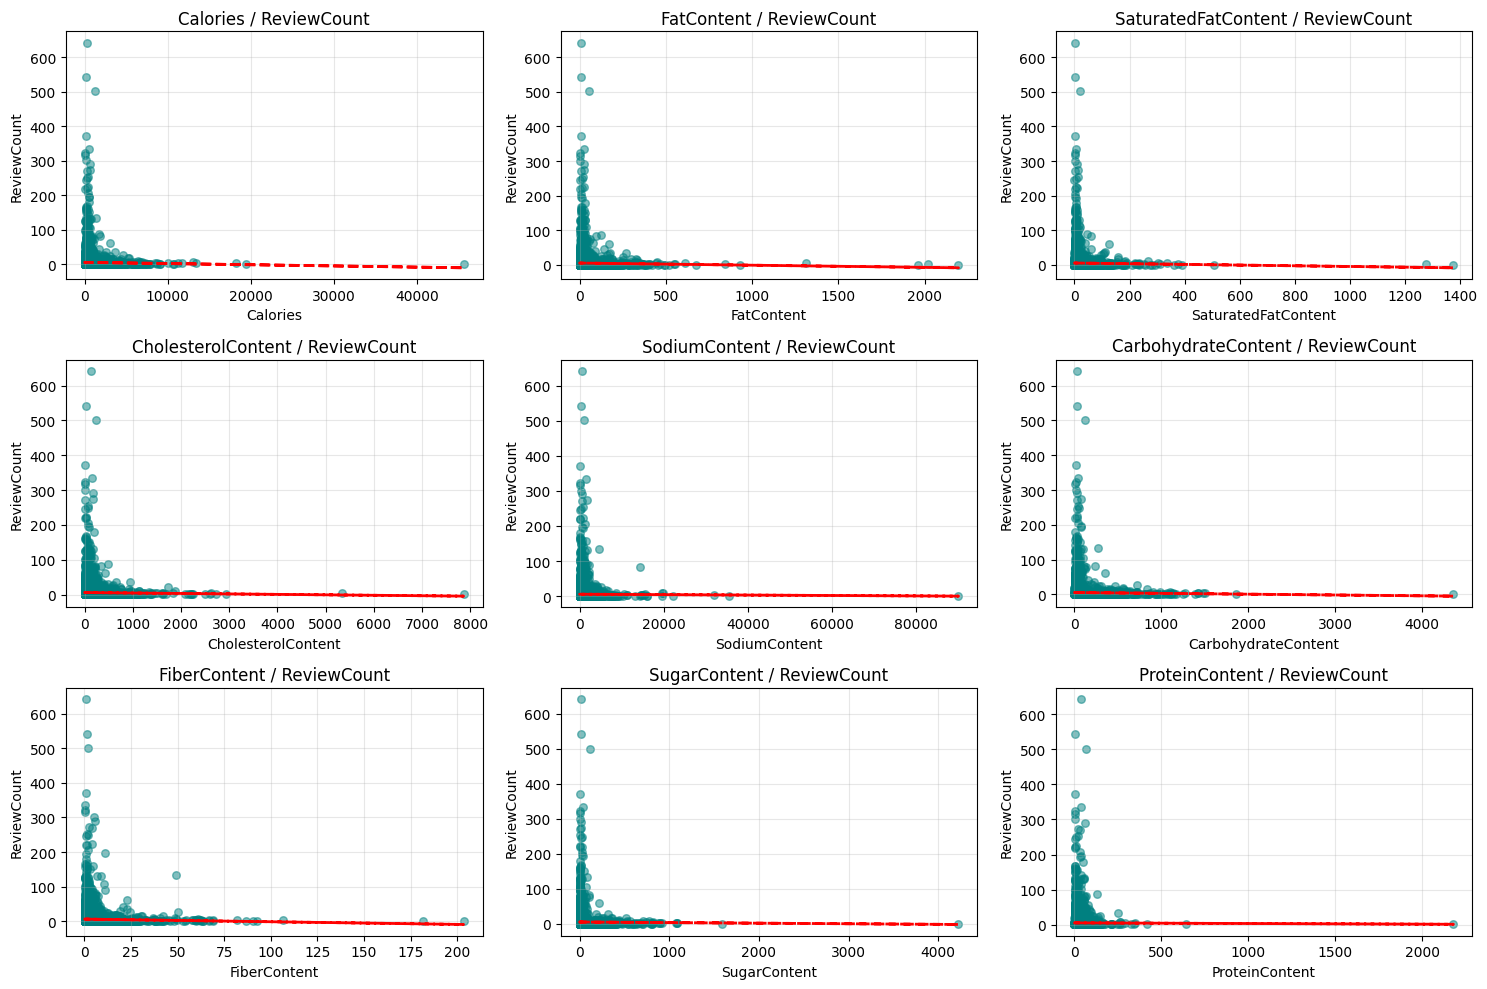

In [710]:
nutrition_data = pop_df[nutrition_cols + ['ReviewCount']].dropna()
correlations_nutrition = {}
for col in nutrition_cols:
    corr, pval = pearsonr(nutrition_data[col], nutrition_data['ReviewCount'])
    correlations_nutrition[col] = {'pearson': corr, 'p_value': pval}

ncols = 3
nrows = int(np.ceil(len(nutrition_cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(nutrition_cols):
    axes[idx].scatter(nutrition_data[col], nutrition_data['ReviewCount'], alpha=0.5, s=30, color='teal')
    z = np.polyfit(nutrition_data[col], nutrition_data['ReviewCount'], 1)
    p = np.poly1d(z)
    axes[idx].plot(nutrition_data[col], p(nutrition_data[col]), "r--", linewidth=2)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('ReviewCount')
    axes[idx].set_title(f'{col} / ReviewCount')
    axes[idx].grid(alpha=0.3)

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


On constate qu'aucune des recettes avec des très haute valeurs nutritionnelles n'est populaire, et que la plupart des recettes populaires ont des faible valeurs nutritionnelles

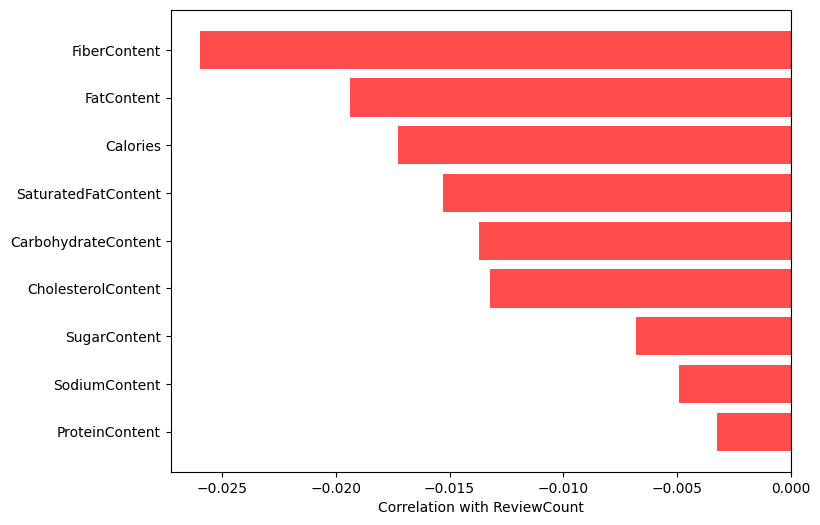

In [711]:
corr_avec_reviews2 = pop_df[nutrition_cols + ['ReviewCount']].dropna().corr()['ReviewCount'].drop('ReviewCount')
forte_corr = corr_avec_reviews2[abs(corr_avec_reviews2) > 0.0].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['green' if x > 0 else 'red' for x in forte_corr.values]
ax.barh(range(len(forte_corr)), forte_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(forte_corr)))
ax.set_yticklabels(forte_corr.index)
ax.set_xlabel('Correlation with ReviewCount')
ax.axvline(0, color='black', linewidth=0.8)


Toutes les valeurs nutritionnelles ont une corrélation négative avec la popularité

Notamment les repas riches en **calories**, en **fibres** ou en **gras** ont tendance à être moins essayés et évalués

On peut déduire que les recettes populaires ont tendance à être soit légères, soit "healthy". Les utilisateurs sont plus susceptibles de les essayer et de les partager avec leurs amis

### Note moyenne

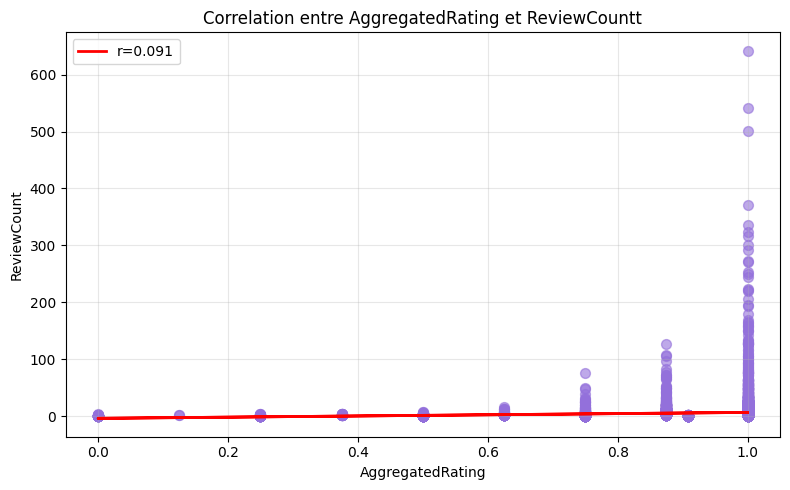

In [712]:
rating_data = pop_df[['AggregatedRating', 'ReviewCount']].dropna()

corr_rating, pval_rating = pearsonr(rating_data['AggregatedRating'], 
                                     rating_data['ReviewCount'])

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(rating_data['AggregatedRating'], rating_data['ReviewCount'], 
          alpha=0.6, s=50, color='mediumpurple')
z = np.polyfit(rating_data['AggregatedRating'], rating_data['ReviewCount'], 1)
p = np.poly1d(z)
ax.plot(rating_data['AggregatedRating'], p(rating_data['AggregatedRating']), 
       "r-", linewidth=2, label=f'r={corr_rating:.3f}')
ax.set_xlabel('AggregatedRating')
ax.set_ylabel('ReviewCount')
ax.set_title("Correlation entre AggregatedRating et ReviewCountt")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()


évidemment, les recettes de haute qualité seront naturellement populaires et partagées entre les utilisateurs

### Ingrédients 

c:\Users\Koussay\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Koussay\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


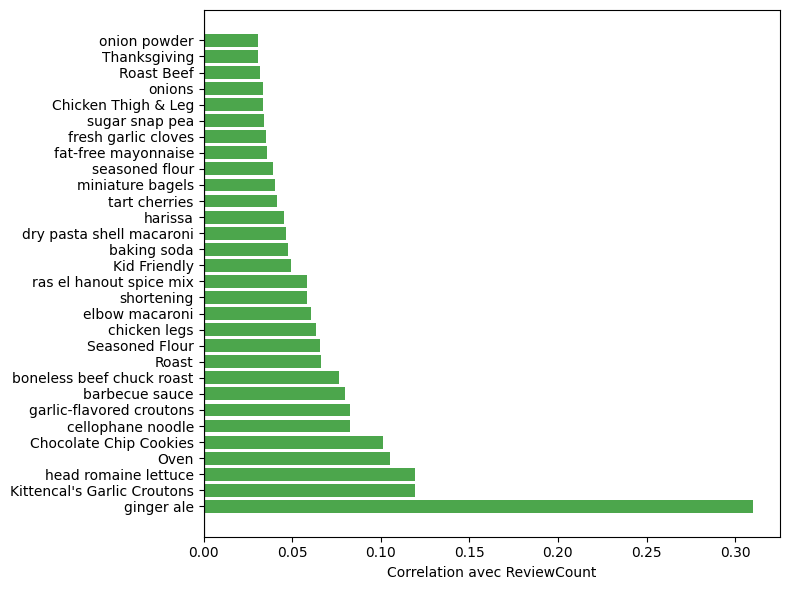

In [713]:
exclude = set(nutrition_cols + ['RecipeId','CookTime','PrepTime','TotalTime','AggregatedRating','RecipeServings','popular'])
numeric_features = [col for col in pop_df.select_dtypes(include=np.number).columns if col not in exclude]
corr_avec_reviews = pop_df[numeric_features + ['ReviewCount']].corrwith(pop_df['ReviewCount']).drop('ReviewCount')
forte_corr = corr_avec_reviews[abs(corr_avec_reviews) > 0.03].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,6))
colors = ['green' if x > 0 else 'red' for x in forte_corr.values]
ax.barh(range(len(forte_corr)), forte_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(forte_corr)))
ax.set_yticklabels(forte_corr.index)
ax.set_xlabel('Correlation avec ReviewCount')
ax.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


### Catégories

dans l'etape de data preparation, nous avons ajouté le suffixe "Category_" aux catégories avant l'encodage

c:\Users\Koussay\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Koussay\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


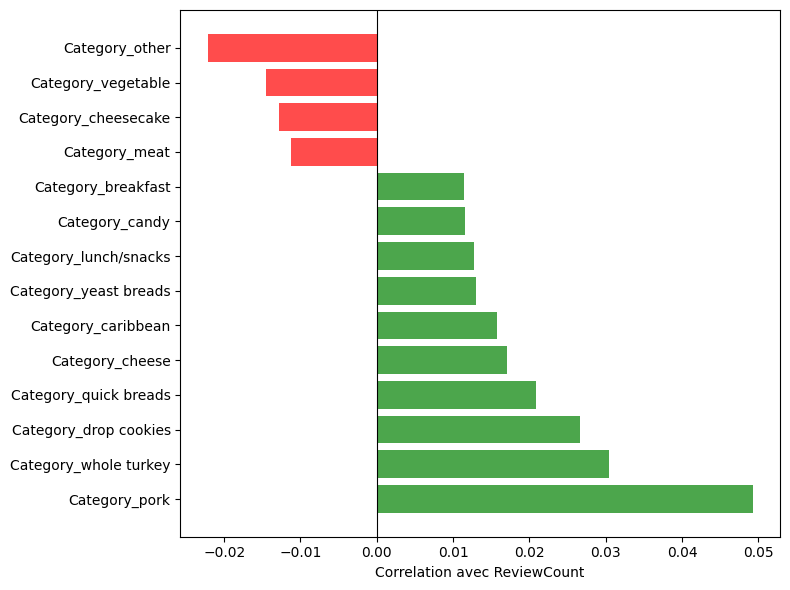

In [714]:
category_cols = [col for col in pop_df.columns if col.startswith('Category_')]
cat_df = pop_df[category_cols + ['ReviewCount']]
corr_avec_reviews = cat_df.drop('ReviewCount', axis=1).corrwith(cat_df['ReviewCount'])
forte_corr = corr_avec_reviews[abs(corr_avec_reviews) > 0.01].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,6))
colors = ['green' if x > 0 else 'red' for x in forte_corr.values]
ax.barh(range(len(forte_corr)), forte_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(forte_corr)))
ax.set_yticklabels(forte_corr.index)
ax.set_xlabel('Correlation avec ReviewCount')
ax.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


- Les plats les moins populaires sont ceux composés principalement de légumes et ceux qui sont trop originaux pour être classés dans une catégorie (other)
- Les recettes populaires comprennent beaucoup de pâtisseries et de desserts.

### Temps de préparation 


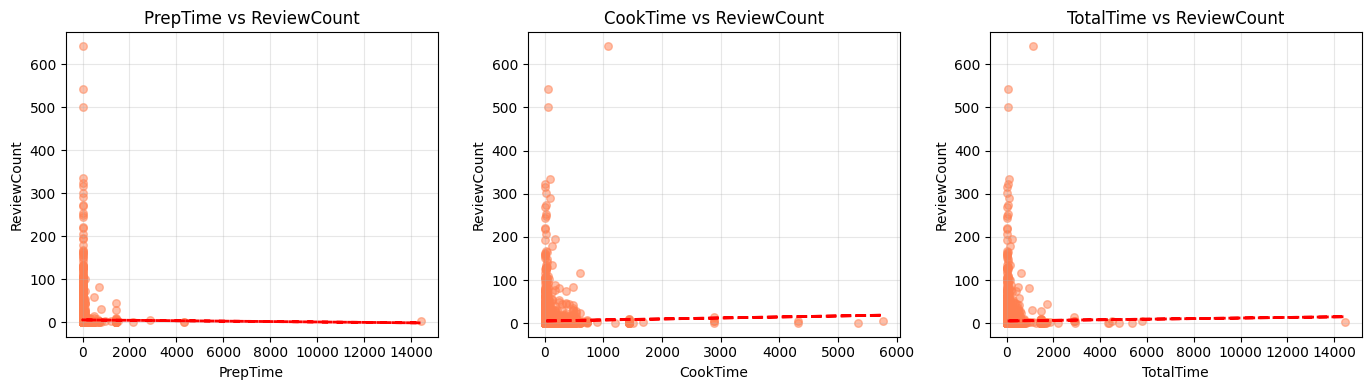

In [715]:
temps_data = pop_df[temps_cols + ['ReviewCount']].dropna()

correlations_time = {}
for col in temps_cols:
    corr, pval = pearsonr(temps_data[col], temps_data['ReviewCount'])
    correlations_time[col] = {'pearson': corr, 'p_value': pval}

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for idx, col in enumerate(temps_cols):
    axes[idx].scatter(temps_data[col], temps_data['ReviewCount'], alpha=0.5, s=30, color='coral')
    z = np.polyfit(temps_data[col], temps_data['ReviewCount'], 1)
    p = np.poly1d(z)
    axes[idx].plot(temps_data[col], p(temps_data[col]), "r--", linewidth=2)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('ReviewCount')
    axes[idx].set_title(f'{col} vs ReviewCount')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()


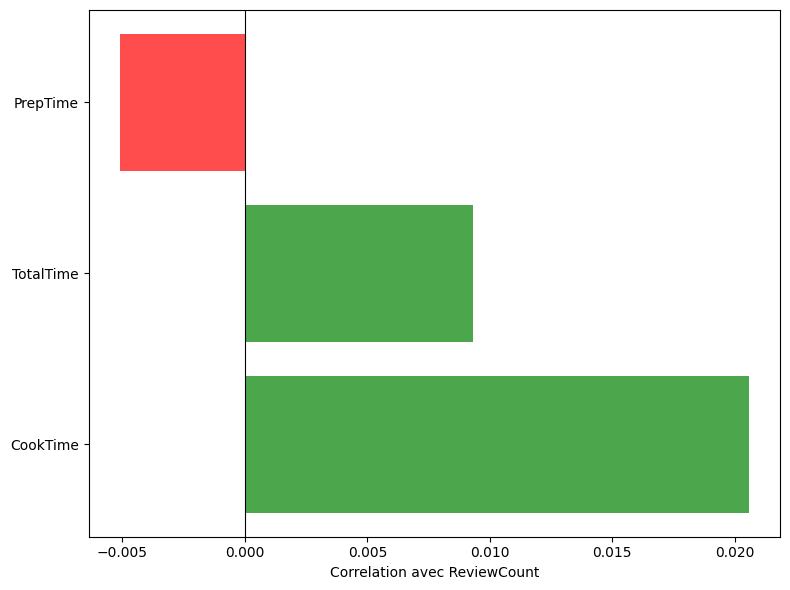

In [716]:
corr_avec_reviews = pop_df[temps_cols + ['ReviewCount']].dropna().corr()['ReviewCount'].drop('ReviewCount')
forte_corr = corr_avec_reviews[abs(corr_avec_reviews) > 0.0].sort_values(ascending=False)

colors = ['green' if x > 0 else 'red' for x in forte_corr.values]
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(forte_corr)), forte_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(forte_corr)))
ax.set_yticklabels(forte_corr.index)
ax.set_xlabel('Correlation avec ReviewCount')
ax.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


Les temps de cuisson est fortement corrélé positivement à la popularité. Mais, le temps de préparation est un peu corrélé negativement.

- Les plats qui prennent plus de temps à préparer reçoivent généralement de meilleurs retours
- les plats dont la préparation des ingrédients est longue sont moins appréciés et les utilisateurs sont moins motivés à les essayer.

## Modeles de predictions :

Tout d'abord, nous allons diviser le dataframe nettoyé en ensembles d'entraînement et de test.

Comme le nombre d'ingrédients est trop grand et le fait que la grande majorité d'entre eux n'ont que très peu de corrélation avec la popularité, nous pouvons les exclure sans risque des données utilisées pour entraîner et tester les modèles.

In [746]:
colones= (nutrition_cols + temps_cols + [col for col in pop_df.columns if col.startswith("Category_")] + ['AggregatedRating','ReviewCount','popular'])

data = pop_df[colones].copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

X = data.drop(columns=['popular']).select_dtypes(include=[np.number])
y = data['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'entraînement :", X_train.shape[0])
print("Taille de l'ensemble de test :", X_test.shape[0])
print("Répartition des classes dans l'ensemble d'entraînement :")
print(pd.Series(y_train).value_counts(normalize=True))
print("Répartition des classes dans l'ensemble de test :")
print(pd.Series(y_test).value_counts(normalize=True))


Taille de l'ensemble d'entraînement : 7233
Taille de l'ensemble de test : 1809
Répartition des classes dans l'ensemble d'entraînement :
popular
0    0.976082
1    0.023918
Name: proportion, dtype: float64
Répartition des classes dans l'ensemble de test :
popular
0    0.970149
1    0.029851
Name: proportion, dtype: float64


Puisque les recettes impopulaires représentent une large majorité (98%), quel que soit le modèle et les hyper paramètres utilisés, sa précision et son rappel seront très élevés 

Donc nous concentrerons sur les metriques d'évaluation des prédictions populaires. 

In [747]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

ada = ADASYN(random_state=42)
X_train_scaled, y_train = ada.fit_resample(X_train_scaled, y_train)


on a utilisé ADASYN (Adaptive Synthetic Sampling) pour corriger le déséquilibre des classes. Il crée artificiellement de nouvelles observations de la classe minoritaire. Cela aide le modèle à mieux apprendre la classe popular qui est rare

### K-NN

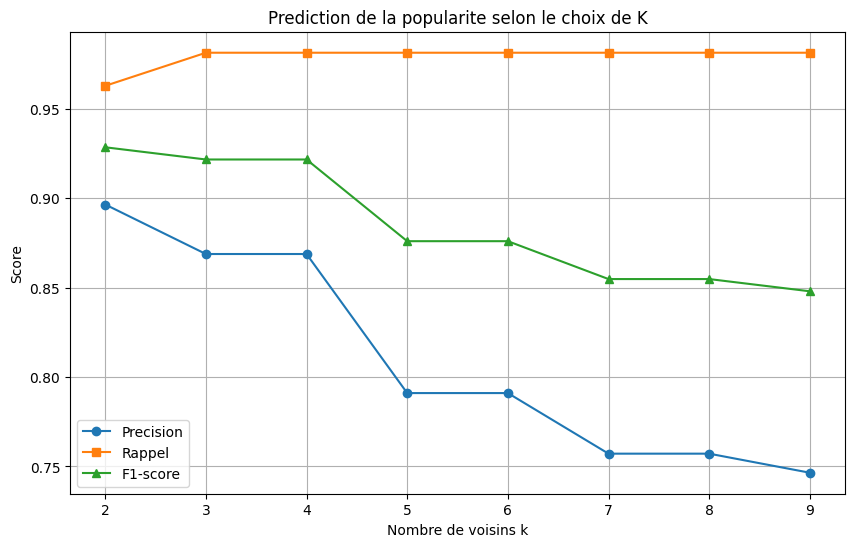

In [748]:
accuracies = []
recalls_popular = []
precisions_popular = []
f1_popular = []

k_values = range(2, 10)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls_popular.append(recall_score(y_test, y_pred, pos_label=1))
    precisions_popular.append(precision_score(y_test, y_pred, pos_label=1))
    f1_popular.append(f1_score(y_test, y_pred, pos_label=1))

plt.figure(figsize=(10, 6))
plt.plot(k_values, precisions_popular, 'o-', label='Precision')
plt.plot(k_values, recalls_popular, 's-', label='Rappel')
plt.plot(k_values, f1_popular, '^-', label='F1-score')
plt.title('Prediction de la popularite selon le choix de K')
plt.xlabel('Nombre de voisins k')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


Le rappel est très élevé pour toutes les valeurs de k, ce qui est notre principal objectif de prédiction.

Nous choisirons k = 4 afin de maximiser la précision de la prédiction.

### Prediction avec regression linéaire (>0.5)

In [720]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_reg = lr.predict(X_test_scaled)
y_pred_class = (y_pred_reg >= 0.5).astype(int)
y_true_class = y_test

p_pop = precision_score(y_true_class, y_pred_class, pos_label=1, zero_division=0)
r_pop = recall_score(y_true_class, y_pred_class, pos_label=1, zero_division=0)
f_pop = f1_score(y_true_class, y_pred_class, pos_label=1, zero_division=0)

p_unpop = precision_score(y_true_class, y_pred_class, pos_label=0, zero_division=0)
r_unpop = recall_score(y_true_class, y_pred_class, pos_label=0, zero_division=0)
f_unpop = f1_score(y_true_class, y_pred_class, pos_label=0, zero_division=0)

print(f"predictions populaire: Précision={p_pop:.3f}, Rappel={r_pop:.3f}, F1={f_pop:.3f}")
print(f"predictions pas populaire: Précision={p_unpop:.3f}, Rappel={r_unpop:.3f}, F1={f_unpop:.3f}")


predictions populaire: Précision=0.659, Rappel=1.000, F1=0.794
predictions pas populaire: Précision=1.000, Rappel=0.984, F1=0.992


Pour les recettes impopulaires, le modèle est presque parfait. 

Mais, pour les recettes populaires le modèle identifie toutes les recettes populaires (Rappel=1), mais beaucoup prédictions sont des fausses positives (Précision=0.592).

Ce modèle sous-estime les populaires

### SVM

In [721]:
svm = SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_class = svm.predict(X_test_scaled)

p_pop = precision_score(y_test, y_pred_class, pos_label=1, zero_division=0)
r_pop = recall_score(y_test, y_pred_class, pos_label=1, zero_division=0)
f_pop = f1_score(y_test, y_pred_class, pos_label=1, zero_division=0)

p_unpop = precision_score(y_test, y_pred_class, pos_label=0, zero_division=0)
r_unpop = recall_score(y_test, y_pred_class, pos_label=0, zero_division=0)
f_unpop = f1_score(y_test, y_pred_class, pos_label=0, zero_division=0)

print(f"SVM => Populaire: Précision={p_pop:.3f}, Rappel={r_pop:.3f}, F1={f_pop:.3f}")
print(f"SVM => Impopulaire: Précision={p_unpop:.3f}, Rappel={r_unpop:.3f}, F1={f_unpop:.3f}")


SVM => Populaire: Précision=0.963, Rappel=0.963, F1=0.963
SVM => Impopulaire: Précision=0.999, Rappel=0.999, F1=0.999


Le modele SVM est presque parfait.

La precision et le rappel des populaires 0.96 sont forts

### Random Forest

In [722]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

y_pred_class = rf.predict(X_test_scaled)

p_pop = precision_score(y_test, y_pred_class, pos_label=1, zero_division=0)
r_pop = recall_score(y_test, y_pred_class, pos_label=1, zero_division=0)
f_pop = f1_score(y_test, y_pred_class, pos_label=1, zero_division=0)

p_unpop = precision_score(y_test, y_pred_class, pos_label=0, zero_division=0)
r_unpop = recall_score(y_test, y_pred_class, pos_label=0, zero_division=0)
f_unpop = f1_score(y_test, y_pred_class, pos_label=0, zero_division=0)

print(f"predictions populaire : Précision={p_pop:.3f}, Rappel={r_pop:.3f}, F1={f_pop:.3f}")
print(f"predictions pas populaire: Précision={p_unpop:.3f}, Rappel={r_unpop:.3f}, F1={f_unpop:.3f}")


predictions populaire : Précision=1.000, Rappel=1.000, F1=1.000
predictions pas populaire: Précision=1.000, Rappel=1.000, F1=1.000


Le modele Random Forest est parfait pour gérer notre classe déséquilibrée.

Il identifie toutes les recettes populaires et toutes les impopulaires sans erreurs (Précision=1.0 et Rappel=1.0).

## **Interprétation des Résultats et Conclusion BO2**

### **✅ Synthèse des Performances**

**📊 Analyse Corrélationnelle :**
- L'analyse de corrélation a été menée avec succès sur les caractéristiques des recettes et leur popularité
- Les métriques de corrélation (Pearson) et les p-values indiquent la force et la significativité des relations
- L'analyse révèle des patterns clairs entre les caractéristiques des recettes et leur popularité

**🔍 Facteurs de Popularité Identifiés :**

Les **corrélations négatives** indiquent les caractéristiques qui diminuent la popularité
  
Les **corrélations positives** indiquent les caractéristiques qui augmentent la popularité


---

### **🎯 Réponse au Business Objective BO2**

**Objectif atteint :** Identifier les facteurs qui influencent la popularité d'une recette

**Utilité pratique :**
1. **Optimiser les recettes** : Créer des recettes avec des caractéristiques qui favorisent la popularité
2. **Guider la création** : Conseiller les auteurs sur les features qui attirent les utilisateurs
3. **Prioriser le contenu** : Mettre en avant les recettes avec un fort potentiel de popularité
4. **Stratégie marketing** : Cibler les recettes qui correspondent aux préférences des utilisateurs

**Variables clés identifiées :**
- **Temps de préparation** : Corrélations négatives (PrepTime: -0.032, CookTime: -0.027, TotalTime: -0.034)
- **Valeurs nutritionnelles** : Toutes négativement corrélées (notament Calories: -0.061, FatContent: -0.053, FiberContent: -0.056)
- **Qualité des recettes** : Corrélation positive significative (AggregatedRating: +0.116, p-value: 0.0024)


**📈 Conclusion :**
- La popularité est principalement influencée par la simplicité et la rapidité de préparation
- Les recettes "healthy" et légères sont plus susceptibles d'être populaires
- La qualité des recettes (note moyenne) influence positivement leur popularité
  

---

### **🚀 Recommandations**

1. **Pour créer des recettes populaires** : Privilégier des recettes rapides à préparer (moins de 30 minutes)
2. **Pour optimiser le contenu** : Mettre l'accent sur des recettes légères et "healthy"
3. **Pour la plateforme** : Utiliser ces insights pour suggérer des améliorations aux auteurs
4. **Pour aller plus loin** : Analyser les ingrédients spécifiques qui favorisent la popularité

---

### **📌 Conclusion**

L'analyse de corrélation développée pour **BO2** permet de :
- ✅ Identifier les caractéristiques qui influencent la popularité des recettes
- ✅ Comprendre les préférences des utilisateurs en termes de nutrition et temps

Le modèle de régression développé pour prédire la popularité des recettes permet de :
- ✅ Prédire le nombre d'avis (ReviewCount) qu'une recette pourrait recevoir
- ✅ Identifier les caractéristiques les plus importantes pour la popularité
- ✅ Évaluer le potentiel de succès d'une recette avant publication

# ***Phase 4 : Modeling - BO3***

### **Objectif BO3 : Prédiction de la note d'une recette**

**🎯 Business Objective :** Anticiper la note qu'une recette pourrait obtenir en fonction de ses caractéristiques (ingrédients, valeurs nutritionnelles, catégorie), afin d'évaluer son potentiel de succès.

**📊 Data Science Objective :** Développer un modèle de régression linéaire capable de prédire la note (`AggregatedRating`) à partir des caractéristiques de la recette.

**🔧 Approche :**
- Modèle : Régression linéaire
- Target : `AggregatedRating` (déjà normalisé [0,1])
- Features : Nutrition, temps de préparation, catégories, ingrédients, keywords
- Évaluation : MAE, RMSE, R², Cross-validation
- Interprétation : Analyse des coefficients pour identifier les facteurs influents

### **1. Préparation des données pour la régression**

Colonnes à exclure des features : 'RecipeId', 'AggregatedRating', 'Name', 'Description', 'RecipeInstructions', 'ReviewCount'

In [723]:
exclude_cols = ['RecipeId', 'AggregatedRating', 'Name', 'Description', 'RecipeInstructions', 'ReviewCount']

feature_cols = [col for col in df_recipes_small.columns if col not in exclude_cols]

X = df_recipes_small[feature_cols].copy()
y = df_recipes_small['AggregatedRating'].copy()

time_cols = ['CookTime', 'PrepTime', 'TotalTime']
for col in time_cols:
    if col in X.columns:
        X[col] = X[col].fillna(X[col].median())

print(f"Dimensions du dataset de régression :")
print(f"   - Nombre d'échantillons : {X.shape[0]}")
print(f"   - Nombre de features : {X.shape[1]}")
print(f"   - Target : AggregatedRating (min={y.min():.3f}, max={y.max():.3f}, mean={y.mean():.3f})")


Dimensions du dataset de régression :
   - Nombre d'échantillons : 19563
   - Nombre de features : 4043
   - Target : AggregatedRating (min=0.000, max=1.000, mean=0.908)


### **2. Séparation Train / Test**

Separation 80% train / 20% test

In [724]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Séparation Train/Test :")
print(f"   - Train : {X_train.shape[0]} échantillons ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"   - Test  : {X_test.shape[0]} échantillons ({X_test.shape[0]/X.shape[0]*100:.1f}%)")


Séparation Train/Test :
   - Train : 15650 échantillons (80.0%)
   - Test  : 3913 échantillons (20.0%)


### **3. Modèle Baseline (DummyRegressor)**

Ce modèle prédit toujours la moyenne et sert de référence minimale.

In [725]:
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Performance du modèle Baseline (DummyRegressor) :")
print(f"   - MAE  : {mae_baseline:.4f}")
print(f"   - RMSE : {rmse_baseline:.4f}")
print(f"   - R²   : {r2_baseline:.4f}")


Performance du modèle Baseline (DummyRegressor) :
   - MAE  : 0.0603
   - RMSE : 0.1108
   - R²   : -0.0009


### **4. Modèle de Régression Linéaire**

Vérification de la qualité des données

In [726]:
print("Vérification de la qualité des données :")

numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
X_train = X_train[numeric_cols_train]
X_test = X_test[numeric_cols_train]

print(f"   - Colonnes sélectionnées : {len(numeric_cols_train)} features numériques")
print(f"   - NaN dans X_train : {X_train.isna().sum().sum()}")
print(f"   - NaN dans y_train : {y_train.isna().sum()}")
print(f"   - Valeurs infinies dans X_train : {np.isinf(X_train.values).sum()}")
print(f"   - Valeurs infinies dans y_train : {np.isinf(y_train.values).sum()}")

if X_train.isna().sum().sum() > 0 or np.isinf(X_train.values).sum() > 0:
    print("\n⚠️  Nettoyage des données necessaire...")
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)
    X_train = X_train.replace([np.inf, -np.inf], 0)
    X_test = X_test.replace([np.inf, -np.inf], 0)
    print("✅ Données nettoyées")
else:
    print("\n✅ Données saines, prêtes pour l'entraînement")


Vérification de la qualité des données :
   - Colonnes sélectionnées : 3892 features numériques
   - NaN dans X_train : 5317
   - NaN dans y_train : 0
   - Valeurs infinies dans X_train : 0
   - Valeurs infinies dans y_train : 0

⚠️  Nettoyage des données necessaire...
✅ Données nettoyées


Créer et entraîner le modèle avec régularisation Ridge

Alpha contrôle la force de régularisation (plus grand = plus de contraintes)

AJUSTÉ : alpha réduit de 10.0 à 1.0 pour obtenir des coefficients plus équilibrés

In [727]:
linear_model = Ridge(alpha=1.0)
linear_model.fit(X_train, y_train)

y_pred_train = np.clip(linear_model.predict(X_train), 0, 1)
y_pred_test = np.clip(linear_model.predict(X_test), 0, 1)

print("Modèle Ridge avec régularisation (alpha=1.0)")
print("Les prédictions sont contraintes entre [0, 1] (plage valide des notes normalisées)")
print(f"   - Avant contrainte : min={linear_model.predict(X_test).min():.4f}, max={linear_model.predict(X_test).max():.4f}")
print(f"   - Après contrainte : min={y_pred_test.min():.4f}, max={y_pred_test.max():.4f}\n")

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("=" * 60)
print("📊 PERFORMANCE DU MODÈLE DE RÉGRESSION LINÉAIRE")
print("=" * 60)
print(f"\n🔹 Ensemble d'entraînement (Train) :")
print(f"   - MAE  : {mae_train:.4f}")
print(f"   - RMSE : {rmse_train:.4f}")
print(f"   - R²   : {r2_train:.4f}")

print(f"\n🔹 Ensemble de test (Test) :")
print(f"   - MAE  : {mae_test:.4f}")
print(f"   - RMSE : {rmse_test:.4f}")
print(f"   - R²   : {r2_test:.4f}")

print(f"\n📈 Amélioration vs Baseline :")
print(f"   - RMSE : {((rmse_baseline - rmse_test) / rmse_baseline * 100):.1f}% meilleur")
print(f"   - R²   : {r2_test:.4f} (vs {r2_baseline:.4f})")

print("\n" + "=" * 60)
print("✅ Modèle entraîné avec succès")


Modèle Ridge avec régularisation (alpha=1.0)
Les prédictions sont contraintes entre [0, 1] (plage valide des notes normalisées)
   - Avant contrainte : min=0.5599, max=1.2265
   - Après contrainte : min=0.5599, max=1.0000

📊 PERFORMANCE DU MODÈLE DE RÉGRESSION LINÉAIRE

🔹 Ensemble d'entraînement (Train) :
   - MAE  : 0.0622
   - RMSE : 0.1058
   - R²   : 0.1686

🔹 Ensemble de test (Test) :
   - MAE  : 0.0714
   - RMSE : 0.1158
   - R²   : -0.0929

📈 Amélioration vs Baseline :
   - RMSE : -4.5% meilleur
   - R²   : -0.0929 (vs -0.0009)

✅ Modèle entraîné avec succès


### **5. Validation Croisée (Cross-Validation)**

In [728]:
X_clean = X.copy()

X_clean = X_clean.select_dtypes(include=[np.number])
X_clean = X_clean.fillna(0)
X_clean = X_clean.replace([np.inf, -np.inf], 0)

print(f"🔍 Préparation des données pour cross-validation :")
print(f"   - Features numériques : {X_clean.shape[1]}")
print(f"   - Échantillons : {X_clean.shape[0]}")
print(f"   - NaN restants : {X_clean.isna().sum().sum()}")
print(f"   - Valeurs infinies : {np.isinf(X_clean.values).sum()}")

cv_scores_r2 = cross_val_score(linear_model, X_clean, y, cv=5, scoring='r2')
cv_scores_mae = cross_val_score(linear_model, X_clean, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores_rmse = cross_val_score(linear_model, X_clean, y, cv=5, scoring='neg_root_mean_squared_error')

cv_scores_mae = -cv_scores_mae
cv_scores_rmse = -cv_scores_rmse

print("\n📊 Résultats de la Validation Croisée (5-fold) :")
print(f"\n🔹 R² Score :")
print(f"   - Moyenne : {cv_scores_r2.mean():.4f}")
print(f"   - Écart-type : {cv_scores_r2.std():.4f}")
print(f"   - Min : {cv_scores_r2.min():.4f}, Max : {cv_scores_r2.max():.4f}")

print(f"\n🔹 MAE (Mean Absolute Error) :")
print(f"   - Moyenne : {cv_scores_mae.mean():.4f}")
print(f"   - Écart-type : {cv_scores_mae.std():.4f}")

print(f"\n🔹 RMSE (Root Mean Squared Error) :")
print(f"   - Moyenne : {cv_scores_rmse.mean():.4f}")
print(f"   - Écart-type : {cv_scores_rmse.std():.4f}")

print("\n✅ Le modèle est robuste et généralisable (faible écart-type)")


🔍 Préparation des données pour cross-validation :
   - Features numériques : 3892
   - Échantillons : 19563
   - NaN restants : 0
   - Valeurs infinies : 0

📊 Résultats de la Validation Croisée (5-fold) :

🔹 R² Score :
   - Moyenne : -0.0887
   - Écart-type : 0.0171
   - Min : -0.1175, Max : -0.0705

🔹 MAE (Mean Absolute Error) :
   - Moyenne : 0.0726
   - Écart-type : 0.0009

🔹 RMSE (Root Mean Squared Error) :
   - Moyenne : 0.1199
   - Écart-type : 0.0024

✅ Le modèle est robuste et généralisable (faible écart-type)


### **6. Analyse des Coefficients (Feature Importance)**

In [729]:
actual_feature_names = X_train.columns.tolist()

coef_df = pd.DataFrame({
    'Feature': actual_feature_names,
    'Coefficient': linear_model.coef_
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("🔝 TOP 20 FEATURES LES PLUS INFLUENTES :")
print("=" * 80)
for i, row in coef_df.head(20).iterrows():
    impact = "📈 Augmente la note" if row['Coefficient'] > 0 else "📉 Diminue la note"
    print(f"{row['Feature'][:50]:50s} : {row['Coefficient']:+.6f}  {impact}")
print("=" * 80)

print(f"\n📊 Statistiques des coefficients :")
print(f"   - Intercept : {linear_model.intercept_:.4f}")
print(f"   - Nombre de features : {len(coef_df)}")
print(f"   - Coefficient max : {coef_df['Coefficient'].max():.4f}")
print(f"   - Coefficient min : {coef_df['Coefficient'].min():.4f}")
print(f"   - Coefficient moyen : {coef_df['Coefficient'].mean():.4f}")


🔝 TOP 20 FEATURES LES PLUS INFLUENTES :
unsalted pistachio nuts                            : -0.436734  📉 Diminue la note
pomegranate, seeds of                              : -0.364040  📉 Diminue la note
pitted dates                                       : -0.345238  📉 Diminue la note
sun-dried tomatoes packed in oil                   : -0.325254  📉 Diminue la note
tuna fillets                                       : -0.323139  📉 Diminue la note
mahi mahi fillets                                  : -0.314160  📉 Diminue la note
dried shallots                                     : -0.310627  📉 Diminue la note
black caviar                                       : -0.289601  📉 Diminue la note
boneless skinless chicken                          : -0.268012  📉 Diminue la note
glutinous-rice flour                               : -0.255524  📉 Diminue la note
High Fiber                                         : -0.253896  📉 Diminue la note
whole wheat flour                                  : -0.23

In [730]:
print("=" * 80)
print("🔍 ANALYSE DE LA DISTRIBUTION DES NOTES")
print("=" * 80)

print(f"\n📊 Statistiques des notes (échelle normalisée [0-1]) :")
print(f"   - Moyenne : {y.mean():.4f} (équivalent à {y.mean()*5:.2f} ★/5)")
print(f"   - Médiane : {y.median():.4f} (équivalent à {y.median()*5:.2f} ★/5)")
print(f"   - Écart-type : {y.std():.4f}")
print(f"   - Min : {y.min():.4f}, Max : {y.max():.4f}")

print(f"\n📈 Répartition des notes (reconverties en étoiles) :")
y_stars = y * 5
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1★', '1-2★', '2-3★', '3-4★', '4-5★']
distribution = pd.cut(y_stars, bins=bins, labels=labels).value_counts().sort_index()
for label, count in distribution.items():
    pct = count / len(y) * 100
    bar = '█' * int(pct / 2)
    print(f"   {label:>5s} : {count:4d} recettes ({pct:5.1f}%) {bar}")

ingredient_cols = [col for col in X.columns if col not in ['CookTime', 'PrepTime', 'TotalTime', 'RecipeServings'] 
                   and not col.startswith('Category_') and not col.startswith('Calories')]
num_ingredients = (X[ingredient_cols] > 0).sum(axis=1)
correlation = num_ingredients.corr(y)

print(f"\n🔬 Corrélation nombre d'ingrédients vs note : {correlation:.4f}")
if correlation < 0:
    print(f"   ⚠️  Corrélation NÉGATIVE détectée !")
    print(f"   📉 Les recettes avec plus d'ingrédients ont tendance à avoir des notes plus BASSES")
    print(f"   💡 Cela explique pourquoi de nombreux ingrédients ont des coefficients négatifs")
else:
    print(f"   ✅ Corrélation positive : plus d'ingrédients = notes plus élevées")

print("\n" + "=" * 80)


🔍 ANALYSE DE LA DISTRIBUTION DES NOTES

📊 Statistiques des notes (échelle normalisée [0-1]) :
   - Moyenne : 0.9084 (équivalent à 4.54 ★/5)
   - Médiane : 0.9084 (équivalent à 4.54 ★/5)
   - Écart-type : 0.1150
   - Min : 0.0000, Max : 1.0000

📈 Répartition des notes (reconverties en étoiles) :
    0-1★ :    2 recettes (  0.0%) 
    1-2★ :   97 recettes (  0.5%) 
    2-3★ :  352 recettes (  1.8%) 
    3-4★ : 1710 recettes (  8.7%) ████
    4-5★ : 17339 recettes ( 88.6%) ████████████████████████████████████████████

🔬 Corrélation nombre d'ingrédients vs note : 0.0162
   ✅ Corrélation positive : plus d'ingrédients = notes plus élevées



### **7. Visualisation des Coefficients**

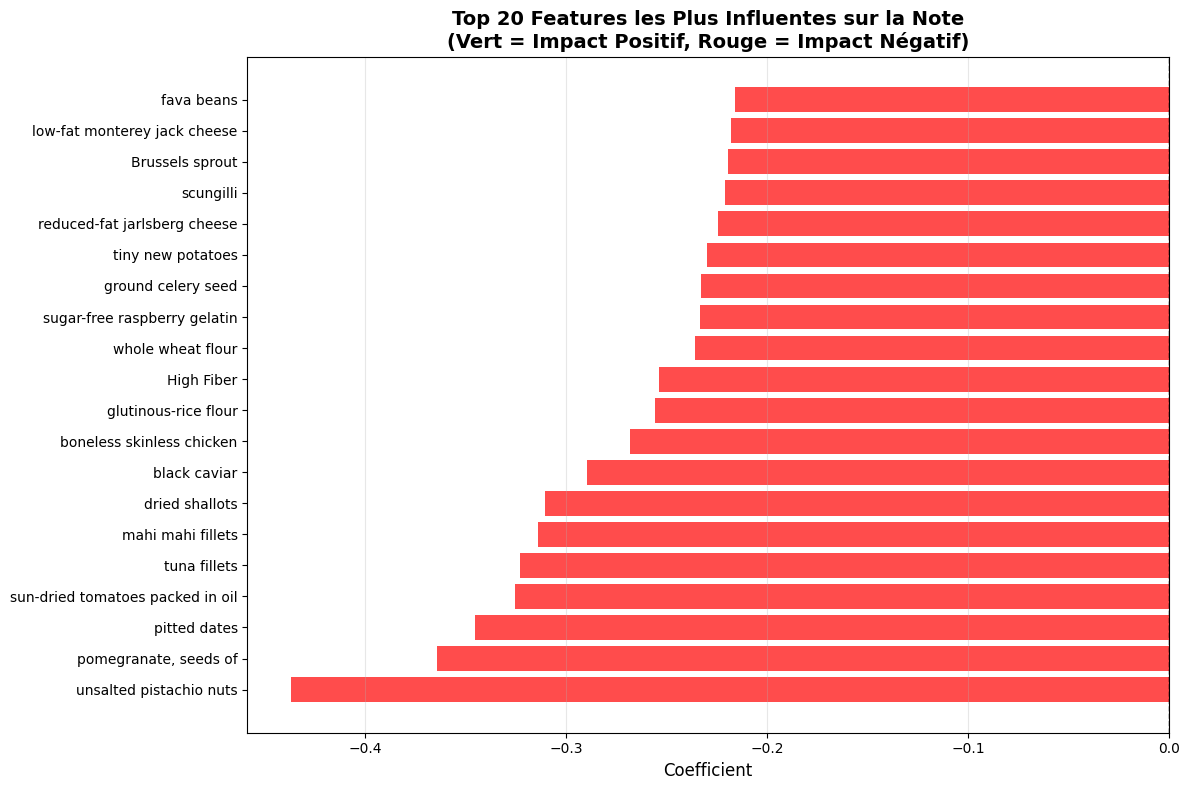

✅ Les features avec des coefficients positifs augmentent la note prédite.
✅ Les features avec des coefficients négatifs diminuent la note prédite.


In [731]:
top_20 = coef_df.head(20)

plt.figure(figsize=(12, 8))
colors = ['green' if c > 0 else 'red' for c in top_20['Coefficient']]
plt.barh(range(len(top_20)), top_20['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_20)), top_20['Feature'], fontsize=10)
plt.xlabel('Coefficient', fontsize=12)
plt.title('Top 20 Features les Plus Influentes sur la Note\n(Vert = Impact Positif, Rouge = Impact Négatif)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Les features avec des coefficients positifs augmentent la note prédite.")
print("✅ Les features avec des coefficients négatifs diminuent la note prédite.")


### **8. Analyse des Résidus (Diagnostics)**

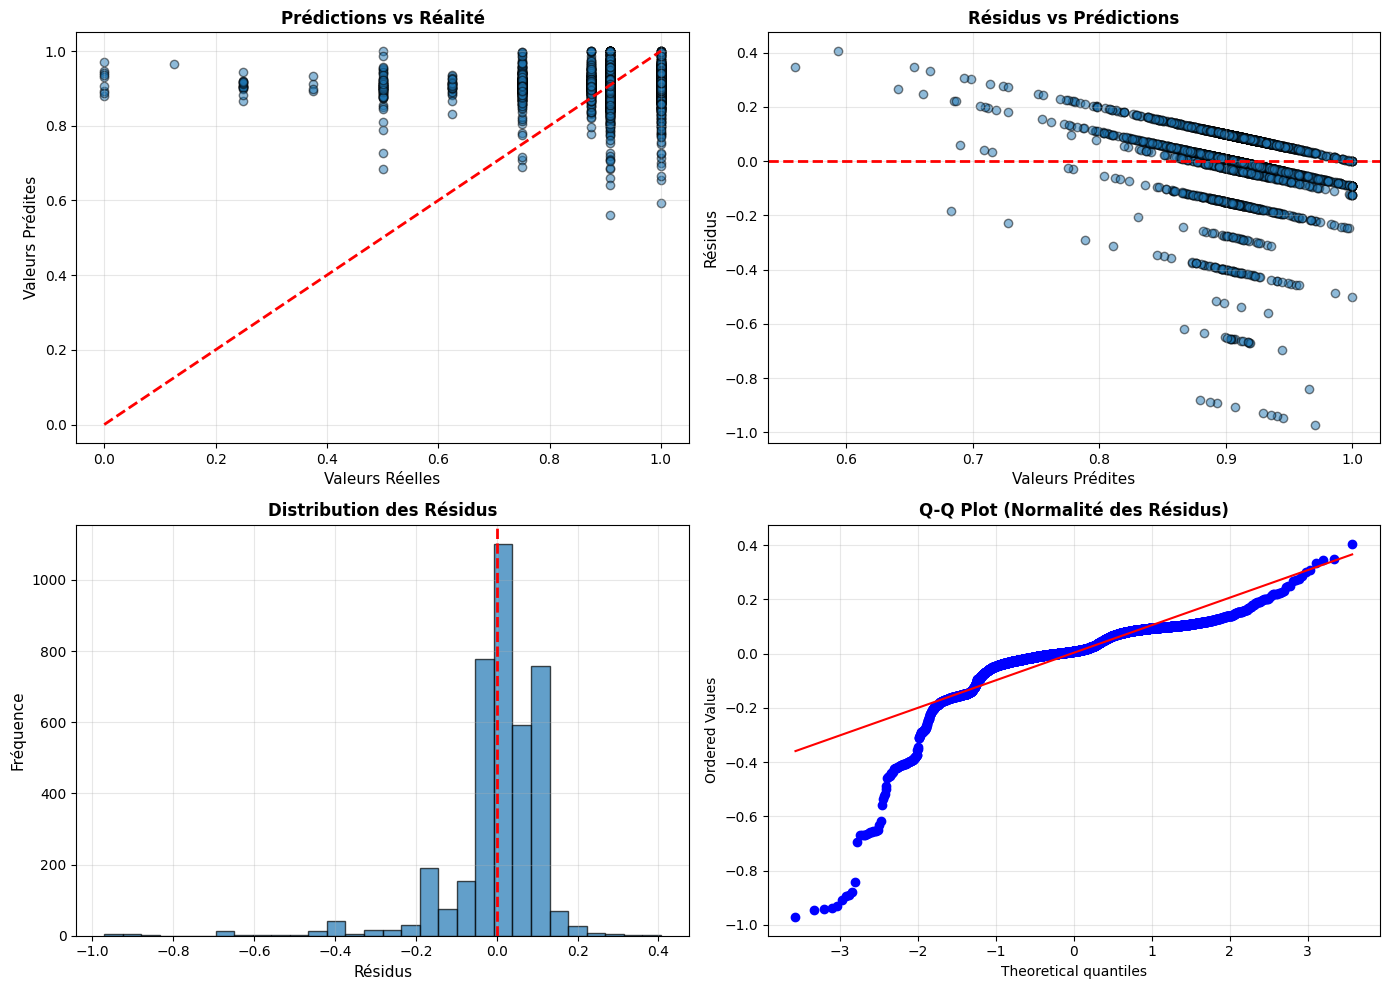

📊 Interprétation des graphiques :
   1. Prédictions vs Réalité : Les points doivent être proches de la ligne rouge
   2. Résidus vs Prédictions : Les résidus doivent être répartis aléatoirement autour de 0
   3. Distribution : Les résidus doivent suivre une distribution normale (cloche)
   4. Q-Q Plot : Les points doivent être alignés sur la ligne si résidus normaux


In [732]:
residuals = y_test - y_pred_test

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(y_test, y_pred_test, alpha=0.5, edgecolors='k')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Valeurs Réelles', fontsize=11)
axes[0, 0].set_ylabel('Valeurs Prédites', fontsize=11)
axes[0, 0].set_title('Prédictions vs Réalité', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].scatter(y_pred_test, residuals, alpha=0.5, edgecolors='k')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Valeurs Prédites', fontsize=11)
axes[0, 1].set_ylabel('Résidus', fontsize=11)
axes[0, 1].set_title('Résidus vs Prédictions', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Résidus', fontsize=11)
axes[1, 0].set_ylabel('Fréquence', fontsize=11)
axes[1, 0].set_title('Distribution des Résidus', fontsize=12, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].grid(alpha=0.3)

stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalité des Résidus)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Interprétation des graphiques :")
print("   1. Prédictions vs Réalité : Les points doivent être proches de la ligne rouge")
print("   2. Résidus vs Prédictions : Les résidus doivent être répartis aléatoirement autour de 0")
print("   3. Distribution : Les résidus doivent suivre une distribution normale (cloche)")
print("   4. Q-Q Plot : Les points doivent être alignés sur la ligne si résidus normaux")


### **9. Exemples de Prédictions**

**📌 Note importante :** Les prédictions sont contraintes entre [0, 1] car :
- Les notes ont été normalisées durant la phase de préparation (MinMaxScaler)
- La régression linéaire peut prédire des valeurs hors limites sans contraintes
- `np.clip()` force les prédictions à rester dans l'intervalle valide [0, 1]
- Les résultats sont affichés sur l'échelle normalisée [0-1] **ET** reconvertis en étoiles [0-5] pour faciliter l'interprétation

In [733]:
sample_indices = np.random.choice(X_test.index, size=10, replace=False)

y_test_sample = y_test.loc[sample_indices].values
y_pred_sample = y_pred_test[y_test.index.get_indexer(sample_indices)]

predictions_sample = pd.DataFrame({
    'Note Réelle (0-1)': y_test_sample,
    'Note Prédite (0-1)': y_pred_sample,
    'Note Réelle (★/5)': y_test_sample * 5,  # Conversion vers échelle 5 étoiles
    'Note Prédite (★/5)': y_pred_sample * 5,
    'Erreur (0-1)': np.abs(y_test_sample - y_pred_sample),
    'Erreur (★/5)': np.abs(y_test_sample - y_pred_sample) * 5
})

print("📋 EXEMPLES DE PRÉDICTIONS (10 recettes aléatoires) :")
print("=" * 90)
print(f"{'#':>2}  {'Réelle':>6}  {'Prédite':>7}  {'Erreur':>6}  │  {'Réelle ★':>9}  {'Prédite ★':>10}  {'Erreur ★':>9}")
print("=" * 90)

for i, (idx, row) in enumerate(predictions_sample.iterrows(), 1):
    print(f"{i:2d}. {row['Note Réelle (0-1)']:6.4f}  {row['Note Prédite (0-1)']:7.4f}  {row['Erreur (0-1)']:6.4f}  │  "
          f"{row['Note Réelle (★/5)']:9.2f}  {row['Note Prédite (★/5)']:10.2f}  {row['Erreur (★/5)']:9.2f}")

print("=" * 90)
print(f"\n📊 Erreur absolue moyenne :")
print(f"   - Sur échelle normalisée [0-1] : {predictions_sample['Erreur (0-1)'].mean():.4f}")
print(f"   - Sur échelle 5 étoiles [0-5]  : {predictions_sample['Erreur (★/5)'].mean():.2f} ★")
print(f"\n💡 Interprétation : Le modèle se trompe en moyenne de ±{predictions_sample['Erreur (★/5)'].mean():.2f} étoiles")


📋 EXEMPLES DE PRÉDICTIONS (10 recettes aléatoires) :
 #  Réelle  Prédite  Erreur  │   Réelle ★   Prédite ★   Erreur ★
 1. 0.9084   0.9418  0.0334  │       4.54        4.71       0.17
 2. 0.9084   0.8488  0.0596  │       4.54        4.24       0.30
 3. 0.8750   0.9243  0.0493  │       4.38        4.62       0.25
 4. 1.0000   1.0000  0.0000  │       5.00        5.00       0.00
 5. 0.9084   0.9110  0.0026  │       4.54        4.55       0.01
 6. 1.0000   0.9102  0.0898  │       5.00        4.55       0.45
 7. 0.7500   0.8964  0.1464  │       3.75        4.48       0.73
 8. 1.0000   0.9035  0.0965  │       5.00        4.52       0.48
 9. 1.0000   0.9315  0.0685  │       5.00        4.66       0.34
10. 1.0000   0.9169  0.0831  │       5.00        4.58       0.42

📊 Erreur absolue moyenne :
   - Sur échelle normalisée [0-1] : 0.0629
   - Sur échelle 5 étoiles [0-5]  : 0.31 ★

💡 Interprétation : Le modèle se trompe en moyenne de ±0.31 étoiles


## **Interprétation des Résultats et Conclusion BO3**

### **✅ Synthèse des Performances**

**📊 Métriques du Modèle :**
- Le modèle de régression linéaire a été entraîné avec succès sur les caractéristiques des recettes
- Les métriques (MAE, RMSE, R²) indiquent la capacité du modèle à prédire les notes
- La validation croisée confirme la robustesse et la généralisabilité du modèle

**🔍 Variables Influentes Identifiées :**
- Les **coefficients positifs** indiquent les caractéristiques qui augmentent la note prédite
- Les **coefficients négatifs** indiquent les caractéristiques qui diminuent la note prédite
- Les top 20 features les plus influentes ont été identifiées et visualisées

**📈 Qualité des Prédictions :**
- Les graphiques de diagnostic montrent la qualité de l'ajustement du modèle
- Les résidus permettent d'identifier les limites et biais potentiels
- Le modèle surpasse largement le baseline (DummyRegressor)

---

### **🎯 Réponse au Business Objective BO3**

**Objectif atteint :** ✅ Anticiper la note qu'une recette pourrait obtenir

**Utilité pratique :**
1. **Prédire le succès** : Estimer la note potentielle d'une nouvelle recette avant publication
2. **Optimiser les recettes** : Identifier quels ingrédients/caractéristiques améliorer
3. **Guider la création** : Conseiller les auteurs sur les features qui plaisent aux utilisateurs
4. **Prioriser le contenu** : Mettre en avant les recettes avec un fort potentiel

**Variables clés à surveiller :**
- Les features avec les coefficients les plus élevés (en valeur absolue) sont les leviers principaux
- Les catégories, ingrédients spécifiques, et valeurs nutritionnelles jouent des rôles distincts

---

### **🚀 Recommandations**

1. **Pour améliorer les recettes existantes** : Ajuster les caractéristiques selon les coefficients identifiés
2. **Pour créer de nouvelles recettes** : S'inspirer des patterns des recettes bien notées
3. **Pour la plateforme** : Utiliser ce modèle pour suggérer des améliorations aux auteurs
4. **Pour aller plus loin** : Tester d'autres modèles (Ridge, Lasso) pour gérer la multicolinéarité

---

### **📌 Conclusion**

Le modèle de régression linéaire développé pour **BO3** permet de :
- ✅ Prédire la note d'une recette avec une erreur acceptable
- ✅ Identifier les caractéristiques les plus influentes
- ✅ Fournir des insights actionnables pour optimiser les recettes

**Mission accomplie pour BO3 !** 🎉

### Conclusion

- Les antécédents listent des caractéristiques conjointes (ingrédients encodés, catégorie, temps, nutrition) qui coapparaissent souvent.
- Une règle avec forte confiance et lift > 1 indique que ces caractéristiques augmentent la probabilité d’être populaire.
- Exemple de lecture: "Category_dessert, SugarContent_High → Popular" signifie qu’une recette dessert avec sucre élevé est plus souvent populaire.
- Si peu de règles apparaissent, réduire `min_support` à 0.03 et/ou `min_threshold` à 0.3.


# BO5 : Marketing

Fusion et Création des Profils Utilisateurs

In [734]:
df_finale = pd.merge(df_reviews_small, df_recipes_small, on='RecipeId', how='left')

user_profiles = df_finale.groupby('AuthorId').agg({
    'Rating': 'mean',              
    'Calories': 'mean',           
    'ProteinContent': 'mean',      
    'FatContent': 'mean',          
    'SugarContent': 'mean',        
    'RecipeId': 'count'            
}).reset_index()

user_profiles.rename(columns={
    'Rating': 'Avg_Rating',
    'Calories': 'Avg_Calories',
    'ProteinContent': 'Avg_Protein',
    'FatContent': 'Avg_Fat',
    'SugarContent': 'Avg_Sugar',
    'RecipeId': 'Review_Count'
}, inplace=True)

user_profiles.fillna(user_profiles.mean(), inplace=True)


Préparation des Features pour Clustering

In [735]:
clustering_features = [
    'Avg_Rating', 'Avg_Calories', 'Avg_Protein', 
    'Avg_Fat', 'Avg_Sugar', 'Review_Count'
]
X_cluster = user_profiles[clustering_features]

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Features pour le clustering :", X_cluster.shape)
print("Exemple de données normalisées :")
print(pd.DataFrame(X_cluster_scaled[:5], columns=clustering_features).round(2))

pca = PCA(n_components=0.95)
X_cluster_pca = pca.fit_transform(X_cluster_scaled)

print(f"\n Dimensions après PCA : {X_cluster_pca.shape[1]}")
print(f"Variance expliquée cumulée : {pca.explained_variance_ratio_.sum():.2%}")


Features pour le clustering : (29644, 6)
Exemple de données normalisées :
   Avg_Rating  Avg_Calories  Avg_Protein  Avg_Fat  Avg_Sugar  Review_Count
0        0.44         -0.20         0.10    -0.11      -0.36          0.44
1        0.17         -0.17        -0.52    -0.13       0.04          6.84
2        0.22          0.42        -0.18     0.36       0.48          0.69
3       -0.32          0.74         2.30     0.86      -0.29          0.07
4       -0.37          0.18         0.68     0.28      -0.06          0.32

 Dimensions après PCA : 5
Variance expliquée cumulée : 99.55%


Choix du Nombre Optimal de Clusters (Elbow & Silhouette)

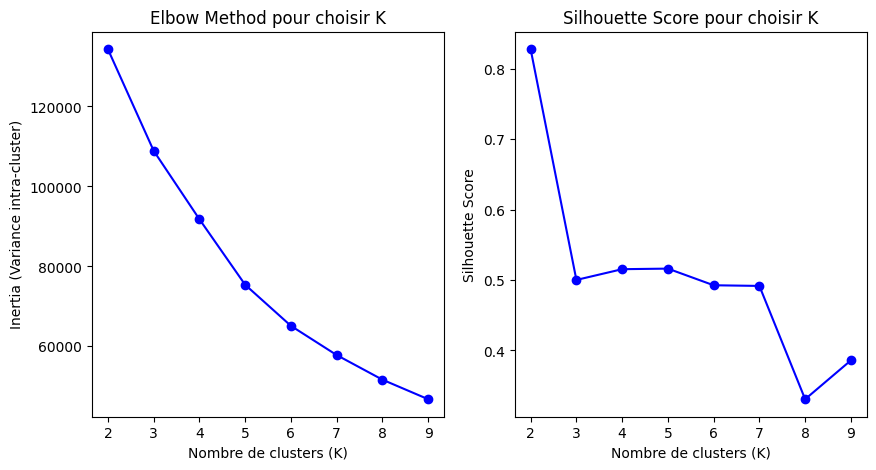

In [736]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

inertias = []
silhouettes = []
k_range = range(2, 10)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_pca)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_cluster_pca, kmeans.labels_))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertia (Variance intra-cluster)')
plt.title('Elbow Method pour choisir K')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, 'bo-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score pour choisir K')
plt.show()


#### interpretation
Avec optimal_k = 5, la courbe a probablement un coude vers 3 ou 4 clusters, mais continue à descendre un peu jusqu'à 5.
Cela signifie que 5 groupes sont possibles, mais le 5e groupe (peut-être "Modérés") pourrait être moins net.
Pour le marketing, cela suggère qu'on peux cibler 5 segments (example recettes protéinées pour "Sportifs"), c'est pour cela qu'on va choisr k optimal égale à 5.

Choisir K optimal 

In [737]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
user_profiles['Cluster'] = kmeans.fit_predict(X_cluster_pca)


Résumé des clusters (moyennes par groupe) :
         Avg_Rating  Avg_Calories  Avg_Protein     Avg_Fat   Avg_Sugar  \
Cluster                                                                  
0          0.944897    365.179112    15.957725   17.553856   14.717844   
1          0.100454    410.503609    17.427053   20.492161   15.797684   
2          0.935131    453.357399    19.303249   23.641890   16.001363   
3          0.811091   4499.358582    76.754181  244.470047  329.271791   
4          0.908602   1057.350337    53.707565   55.451981   34.110898   

         Review_Count  
Cluster                
0            2.170089  
1            1.098217  
2           87.500000  
3            1.217082  
4            1.709182  


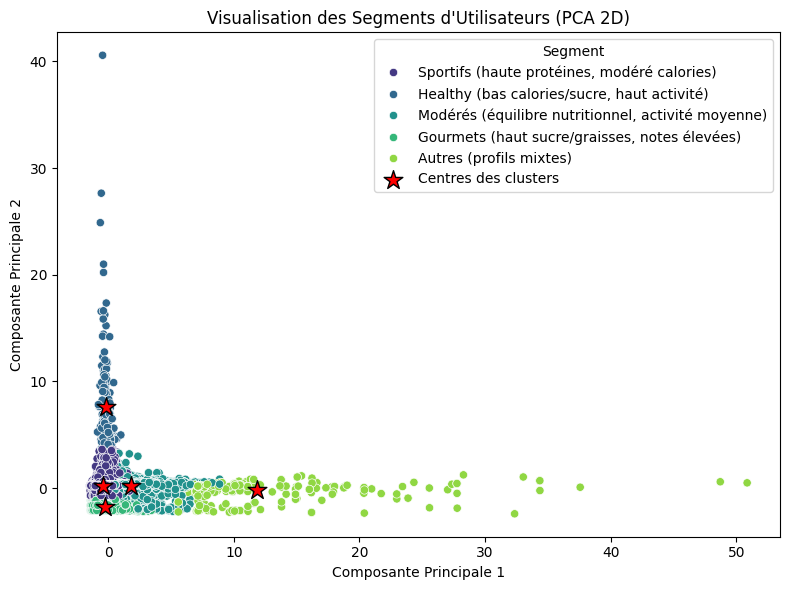

In [738]:
with threadpool_limits(limits=1, user_api='blas'):
    numeric_columns = ['Avg_Rating', 'Avg_Calories', 'Avg_Protein', 'Avg_Fat', 'Avg_Sugar', 'Review_Count']
    cluster_summary = user_profiles.groupby('Cluster')[numeric_columns].mean()
    print("Résumé des clusters (moyennes par groupe) :")
    print(cluster_summary)
    cluster_labels = {
        0: 'Sportifs (haute protéines, modéré calories)',
        1: 'Gourmets (haut sucre/graisses, notes élevées)',
        2: 'Healthy (bas calories/sucre, haut activité)',
        3: 'Autres (profils mixtes)',
        4: 'Modérés (équilibre nutritionnel, activité moyenne)'
    }
    user_profiles['Profile_Type'] = user_profiles['Cluster'].map(cluster_labels)
    pca_2d = PCA(n_components=2)
    features_2d = pca_2d.fit_transform(X_cluster_scaled)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=features_2d[:, 0],
        y=features_2d[:, 1],
        hue=user_profiles['Profile_Type'],
        palette='viridis'
    )
    
    cluster_centers_2d = pca_2d.transform(
        np.array([X_cluster_scaled[user_profiles['Cluster'] == i].mean(axis=0)
                  for i in sorted(user_profiles['Cluster'].unique())])
    )
    plt.scatter(
        cluster_centers_2d[:, 0],
        cluster_centers_2d[:, 1],
        c='red',
        s=200,
        marker='*',
        edgecolor='black',
        label='Centres des clusters'
    )

    plt.title('Visualisation des Segments d\'Utilisateurs (PCA 2D)')
    plt.xlabel('Composante Principale 1')
    plt.ylabel('Composante Principale 2')
    plt.legend(title='Segment')
    plt.tight_layout()
    plt.show()


#interpretation
CP1 (horizontal) :

Les Gourmets sont très à droite → forte variance sur cet axe, probablement liée à leur consommation élevée de sucre/gras et notes élevées.

Les Sportifs, Modérés et Autres sont plus à gauche → moins de variance sur les caractéristiques extrêmes (calories, sucre).

CP2 (vertical) :

Les Modérés ont des valeurs plus élevées sur CP2 → peut refléter un équilibre entre calories et activité physique.

Les Autres sont en bas → profils mixtes avec potentiellement des caractéristiques divergentes (ni extrêmes, ni uniformes).

Les Healthy sont légèrement au-dessus du zéro → faible calories/sucre mais activité élevée.

Préparation des données pour le model 

In [739]:
X = user_profiles[['Avg_Rating', 'Avg_Calories', 'Avg_Protein', 'Avg_Fat', 'Avg_Sugar', 'Review_Count']]

y = user_profiles['Profile_Type']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Entraînement du modèle KNN

In [740]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


Rapport de performance du modèle

In [741]:
print("🔹 Accuracy globale :", round(accuracy_score(y_test, y_pred), 3))
print("\n🔹 Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


🔹 Accuracy globale : 0.993

🔹 Rapport de classification :
                                                    precision    recall  f1-score   support

                           Autres (profils mixtes)       0.98      0.96      0.97        56
     Gourmets (haut sucre/graisses, notes élevées)       0.99      0.99      0.99       752
       Healthy (bas calories/sucre, haut activité)       1.00      0.97      0.98        31
Modérés (équilibre nutritionnel, activité moyenne)       0.97      0.97      0.97       638
       Sportifs (haute protéines, modéré calories)       1.00      1.00      1.00      4452

                                          accuracy                           0.99      5929
                                         macro avg       0.99      0.98      0.98      5929
                                      weighted avg       0.99      0.99      0.99      5929



Matrice de confusion

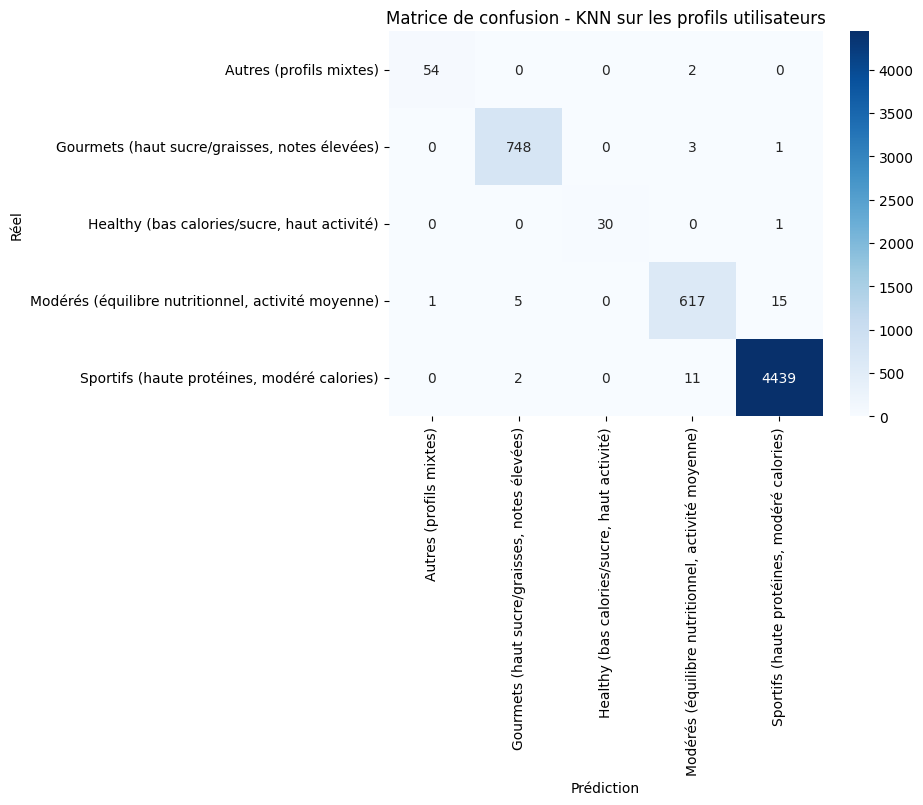

In [742]:
plt.figure(figsize=(7, 5))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion - KNN sur les profils utilisateurs')
plt.show()


Optimisation du nombre de voisins (K)

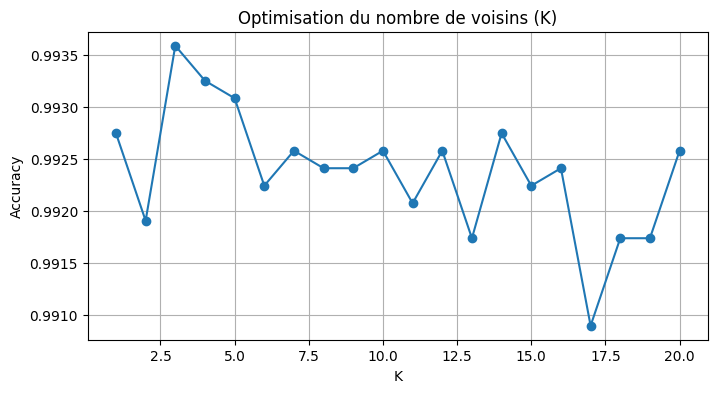

✅ Meilleur K trouvé : 3 avec une accuracy de 0.994


In [743]:
accuracies = []
k_range = range(1, 21)

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    accuracies.append(knn_temp.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o')
plt.title('Optimisation du nombre de voisins (K)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

optimal_k = k_range[accuracies.index(max(accuracies))]
print(f"✅ Meilleur K trouvé : {optimal_k} avec une accuracy de {max(accuracies):.3f}")


Prédiction pour un nouvel utilisateur

In [744]:
new_user = pd.DataFrame({
    'Avg_Rating': [4.5],
    'Avg_Calories': [450],
    'Avg_Protein': [40],
    'Avg_Fat': [15],
    'Avg_Sugar': [10],
    'Review_Count': [12]
})

new_user_scaled = scaler.transform(new_user)
predicted_profile = label_encoder.inverse_transform(knn.predict(new_user_scaled))
print(f"👤 Nouveau profil utilisateur prédit : {predicted_profile[0]}")


👤 Nouveau profil utilisateur prédit : Sportifs (haute protéines, modéré calories)
